In [1]:
"""This tutorial shows how to train an MATD3 agent on the simple speaker listener multi-particle environment.

Authors: Michael (https://github.com/mikepratt1), Nickua (https://github.com/nicku-a)
"""

import os

import matplotlib.pyplot as plt
import numpy as np
import torch
from pettingzoo.mpe import simple_speaker_listener_v4
from mpe2 import simple_speaker_listener_v4

from agilerl.algorithms import MATD3
from agilerl.algorithms.core.registry import HyperparameterConfig, RLParameter
from agilerl.components.multi_agent_replay_buffer import MultiAgentReplayBuffer
from agilerl.hpo.mutation import Mutations
from agilerl.hpo.tournament import TournamentSelection
from agilerl.utils.utils import (
    create_population,
    default_progress_bar,
    make_multi_agent_vect_envs,
)

/tmp/ipykernel_151987/4085195098.py:11: DeprecationWarning: The environment `pettingzoo.mpe` has been moved to `mpe2` and will be removed in a future release.Please update your imports.
  from pettingzoo.mpe import simple_speaker_listener_v4


[2025-11-23 13:26:04,661] [WARNING] [real_accelerator.py:209:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.


/home/franc/miniconda3/envs/projeto_rl/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


INFO 11-23 13:26:14 [__init__.py:239] No platform detected, vLLM is running on UnspecifiedPlatform
WARNING 11-23 13:26:16 [_custom_ops.py:20] Failed to import from vllm._C with ImportError('libcuda.so.1: cannot open shared object file: No such file or directory')


===== AgileRL Online Multi-Agent Demo =====
Training...


🚀 Training Progress │   0% │                      │ 10000/2000000 steps │ ⏱️ 00:49 │ ⏳ 2:42:28 │ 204.13step/s 

--- Global steps 40000 ---
Steps [10000, 10000, 10000, 10000]
Scores: [-82.25928274258928, -142.80549746362738, -195.9764473670154, -93.63572712170793]
Fitnesses: ['-54.17', '-94.64', '-472.99', '-55.25']
5 fitness avgs: ['-54.17', '-94.64', '-472.99', '-55.25']
Mutations: [None, None, None, None]


🚀 Training Progress │   1% │ ▏                    │ 20000/2000000 steps │ ⏱️ 01:43 │ ⏳ 2:56:25 │ 187.04step/s 

--- Global steps 80000 ---
Steps [20000, 20000, 20000, 20000]
Scores: [-267.9011665150512, -61.64335673858887, -239.74849386179477, -65.69153617434799]
Fitnesses: ['-349.27', '-104.24', '-252.73', '-105.12']
5 fitness avgs: ['-201.72', '-79.74', '-153.45', '-80.18']
Mutations: ['None', 'lr_actor', 'None', 'lr_actor']


🚀 Training Progress │   2% │ ▎                    │ 30000/2000000 steps │ ⏱️ 02:46 │ ⏳ 3:22:31 │ 162.12step/s 

--- Global steps 120000 ---
Steps [30000, 30000, 30000, 30000]
Scores: [-140.3258261680616, -115.07880408172758, -209.93288515554616, -92.6202216208769]
Fitnesses: ['-157.86', '-153.00', '-173.53', '-89.42']
5 fitness avgs: ['-105.78', '-104.16', '-111.30', '-82.97']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │   2% │ ▍                    │ 40000/2000000 steps │ ⏱️ 03:37 │ ⏳ 2:50:28 │ 191.63step/s 

--- Global steps 160000 ---
Steps [40000, 40000, 40000, 40000]
Scores: [-147.49034212275043, -109.68408584812298, -136.26570008459439, -148.11015925384322]
Fitnesses: ['-88.52', '-88.67', '-142.03', '-128.46']
5 fitness avgs: ['-84.36', '-84.40', '-113.63', '-110.24']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │   2% │ ▌                    │ 50000/2000000 steps │ ⏱️ 04:33 │ ⏳ 2:56:24 │ 184.22step/s 

--- Global steps 200000 ---
Steps [50000, 50000, 50000, 50000]
Scores: [-120.0427779056799, -214.56043763843473, -103.00218478857494, -111.38005375746393]
Fitnesses: ['-115.24', '-81.69', '-65.12', '-194.01']
5 fitness avgs: ['-90.53', '-83.82', '-80.54', '-106.29']
Mutations: ['None', 'remove_latent_node', 'add_latent_node', 'None']


🚀 Training Progress │   3% │ ▌                    │ 60000/2000000 steps │ ⏱️ 05:24 │ ⏳ 2:43:40 │ 197.54step/s 

--- Global steps 240000 ---
Steps [60000, 60000, 60000, 60000]
Scores: [-115.51310209046432, -307.27728785136765, -80.64594402241649, -72.91195043052866]
Fitnesses: ['-129.74', '-329.21', '-51.80', '-42.92']
5 fitness avgs: ['-95.44', '-145.33', '-79.85', '-78.08']
Mutations: ['None', 'add_latent_node', 'learn_step', 'None']


🚀 Training Progress │   4% │ ▋                    │ 70000/2000000 steps │ ⏱️ 06:17 │ ⏳ 2:45:41 │ 194.13step/s 

--- Global steps 280000 ---
Steps [70000, 70000, 70000, 70000]
Scores: [-78.66891022837503, -66.56562588903743, -63.77303155165555, -532.4638549110601]
Fitnesses: ['-62.40', '-82.64', '-55.73', '-508.11']
5 fitness avgs: ['-69.71', '-75.53', '-68.37', '-226.10']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │   4% │ ▊                    │ 80000/2000000 steps │ ⏱️ 07:08 │ ⏳ 2:39:14 │ 200.95step/s 

--- Global steps 320000 ---
Steps [80000, 80000, 80000, 80000]
Scores: [-63.058315493538615, -67.97290635865477, -197.26797241097705, -71.13633755612076]
Fitnesses: ['-52.84', '-75.02', '-287.43', '-74.18']
5 fitness avgs: ['-61.06', '-65.49', '-107.98', '-72.48']
Mutations: ['learn_step', 'None', 'head_net.add_node', 'learn_step']


🚀 Training Progress │   4% │ ▉                    │ 90000/2000000 steps │ ⏱️ 08:01 │ ⏳ 2:45:56 │ 191.84step/s 

--- Global steps 360000 ---
Steps [90000, 90000, 90000, 90000]
Scores: [-70.38902315317546, -71.44012148828666, -170.59651335961252, -64.88373128403144]
Fitnesses: ['-49.42', '-54.77', '-173.78', '-51.72']
5 fitness avgs: ['-53.21', '-65.70', '-89.51', '-58.10']
Mutations: ['None', 'None', 'add_latent_node', 'None']


🚀 Training Progress │   5% │ █                    │ 100000/2000000 steps │ ⏱️ 08:51 │ ⏳ 2:35:29 │ 203.65step/s 

--- Global steps 400000 ---
Steps [100000, 100000, 100000, 100000]
Scores: [-66.62429888475306, -72.20065788517707, -74.38740508249194, -64.01748277345412]
Fitnesses: ['-59.05', '-63.31', '-62.55', '-73.26']
5 fitness avgs: ['-51.99', '-52.84', '-52.69', '-54.83']
Mutations: ['lr_actor', 'param', 'learn_step', 'None']


🚀 Training Progress │   6% │ █                    │ 110000/2000000 steps │ ⏱️ 09:47 │ ⏳ 2:47:57 │ 187.56step/s 

--- Global steps 440000 ---
Steps [110000, 110000, 110000, 110000]
Scores: [-75.36688029945077, -67.91435920202521, -84.64046611174388, -130.59135807346604]
Fitnesses: ['-90.72', '-74.86', '-69.52', '-89.03']
5 fitness avgs: ['-61.55', '-59.23', '-58.01', '-61.21']
Mutations: ['lr_actor', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │   6% │ █▏                   │ 120000/2000000 steps │ ⏱️ 10:54 │ ⏳ 3:04:52 │ 169.49step/s 

--- Global steps 480000 ---
Steps [120000, 120000, 120000, 120000]
Scores: [-74.00741041064212, -77.71568571507443, -70.97449723248583, -65.28680031678881]
Fitnesses: ['-54.31', '-62.99', '-74.65', '-54.09']
5 fitness avgs: ['-57.72', '-59.46', '-61.79', '-58.90']
Mutations: ['batch_size', 'head_net.remove_node', 'lr_critic', 'param']


🚀 Training Progress │   6% │ █▎                   │ 130000/2000000 steps │ ⏱️ 11:53 │ ⏳ 3:07:02 │ 166.62step/s 

--- Global steps 520000 ---
Steps [130000, 130000, 130000, 130000]
Scores: [-62.88395998231445, -202.96738000332755, -71.03861210455189, -60.286565231970926]
Fitnesses: ['-63.08', '-344.10', '-58.21', '-39.22']
5 fitness avgs: ['-60.95', '-117.16', '-58.80', '-56.18']
Mutations: ['None', 'remove_latent_node', 'None', 'batch_size']


🚀 Training Progress │   7% │ █▍                   │ 140000/2000000 steps │ ⏱️ 12:46 │ ⏳ 2:45:07 │ 187.75step/s 

--- Global steps 560000 ---
Steps [140000, 140000, 140000, 140000]
Scores: [-66.64084061937226, -78.391693606394, -67.55487696339281, -70.25205455721193]
Fitnesses: ['-54.40', '-88.58', '-78.82', '-92.01']
5 fitness avgs: ['-57.17', '-66.63', '-66.83', '-64.70']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │   8% │ █▌                   │ 150000/2000000 steps │ ⏱️ 13:37 │ ⏳ 2:34:19 │ 199.79step/s 

--- Global steps 600000 ---
Steps [150000, 150000, 150000, 150000]
Scores: [-144.70866753915766, -84.85697715276906, -71.8527071643332, -70.15967523242216]
Fitnesses: ['-261.90', '-122.28', '-85.02', '-83.78']
5 fitness avgs: ['-96.89', '-78.63', '-61.52', '-61.27']
Mutations: ['remove_latent_node', 'None', 'None', 'None']


🚀 Training Progress │   8% │ █▌                   │ 160000/2000000 steps │ ⏱️ 14:26 │ ⏳ 2:25:27 │ 210.83step/s 

--- Global steps 640000 ---
Steps [160000, 160000, 160000, 160000]
Scores: [-75.58445821069107, -83.24639257453993, -73.47532121098101, -78.80760803617373]
Fitnesses: ['-95.76', '-69.79', '-72.52', '-89.87']
5 fitness avgs: ['-65.45', '-60.25', '-60.80', '-64.52']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │   8% │ █▋                   │ 170000/2000000 steps │ ⏱️ 15:21 │ ⏳ 2:34:51 │ 196.94step/s 

--- Global steps 680000 ---
Steps [170000, 170000, 170000, 170000]
Scores: [-107.7367221631785, -79.01277584926295, -81.41921439261792, -78.54436694803184]
Fitnesses: ['-156.48', '-47.27', '-97.15', '-113.81']
5 fitness avgs: ['-80.73', '-59.44', '-68.87', '-72.75']
Mutations: ['head_net.add_layer', 'None', 'None', 'None']


🚀 Training Progress │   9% │ █▊                   │ 180000/2000000 steps │ ⏱️ 16:22 │ ⏳ 2:51:01 │ 177.36step/s 

--- Global steps 720000 ---
Steps [180000, 180000, 180000, 180000]
Scores: [-73.80637342048644, -74.52550388540891, -66.1429874757894, -72.90226127757664]
Fitnesses: ['-72.56', '-85.90', '-96.11', '-53.61']
5 fitness avgs: ['-66.11', '-68.77', '-84.12', '-62.32']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │  10% │ █▉                   │ 190000/2000000 steps │ ⏱️ 17:15 │ ⏳ 2:35:39 │ 193.79step/s 

--- Global steps 760000 ---
Steps [190000, 190000, 190000, 190000]
Scores: [-68.11307226934821, -96.07311396423535, -73.28654005013648, -66.32920471993123]
Fitnesses: ['-80.65', '-60.93', '-74.97', '-58.72']
5 fitness avgs: ['-67.57', '-63.62', '-70.22', '-84.99']
Mutations: ['param', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  10% │ ██                   │ 200000/2000000 steps │ ⏱️ 18:23 │ ⏳ 3:18:25 │ 151.19step/s 

--- Global steps 800000 ---
Steps [200000, 200000, 200000, 200000]
Scores: [-66.48489174872807, -66.20342221787487, -81.85189217038405, -63.721507676904174]
Fitnesses: ['-57.80', '-83.12', '-64.67', '-35.11']
5 fitness avgs: ['-79.79', '-84.86', '-81.17', '-75.25']
Mutations: ['None', 'batch_size', 'head_net.add_node', 'None']


🚀 Training Progress │  10% │ ██                   │ 210000/2000000 steps │ ⏱️ 19:20 │ ⏳ 2:49:28 │ 176.03step/s 

--- Global steps 840000 ---
Steps [210000, 210000, 210000, 210000]
Scores: [-71.7890644090351, -61.94376100727001, -69.18920460040854, -66.63963997612922]
Fitnesses: ['-82.10', '-76.77', '-136.54', '-85.90']
5 fitness avgs: ['-77.17', '-76.10', '-93.97', '-82.47']
Mutations: ['encoder.add_node', 'None', 'None', 'None']


🚀 Training Progress │  11% │ ██▏                  │ 220000/2000000 steps │ ⏱️ 20:27 │ ⏳ 2:55:07 │ 169.40step/s 

--- Global steps 880000 ---
Steps [220000, 220000, 220000, 220000]
Scores: [-63.20837619080337, -79.46844953762361, -59.3973615109337, -62.890295285040956]
Fitnesses: ['-80.36', '-64.28', '-51.11', '-74.57']
5 fitness avgs: ['-69.41', '-67.26', '-63.56', '-68.26']
Mutations: ['None', 'lr_critic', 'None', 'learn_step']


🚀 Training Progress │  12% │ ██▎                  │ 230000/2000000 steps │ ⏱️ 21:17 │ ⏳ 2:29:04 │ 197.89step/s 

--- Global steps 920000 ---
Steps [230000, 230000, 230000, 230000]
Scores: [-68.86607844270839, -69.72715505099907, -82.45280003288718, -65.65220811968956]
Fitnesses: ['-32.26', '-53.58', '-86.37', '-75.90']
5 fitness avgs: ['-50.79', '-59.75', '-65.32', '-59.52']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  12% │ ██▍                  │ 240000/2000000 steps │ ⏱️ 22:16 │ ⏳ 2:38:38 │ 184.91step/s 

--- Global steps 960000 ---
Steps [240000, 240000, 240000, 240000]
Scores: [-65.11897258422289, -65.7818409269672, -83.80651903284748, -64.34275735571325]
Fitnesses: ['-61.06', '-72.98', '-80.67', '-32.80']
5 fitness avgs: ['-51.26', '-53.65', '-69.71', '-45.61']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  12% │ ██▌                  │ 250000/2000000 steps │ ⏱️ 23:07 │ ⏳ 2:27:54 │ 197.20step/s 

--- Global steps 1000000 ---
Steps [250000, 250000, 250000, 250000]
Scores: [-62.400085464433374, -68.42555428142197, -63.22551105917602, -66.21481703018857]
Fitnesses: ['-100.57', '-114.05', '-78.09', '-84.23']
5 fitness avgs: ['-58.70', '-61.40', '-54.21', '-55.43']
Mutations: ['encoder.remove_node', 'learn_step', 'encoder.add_node', 'batch_size']


🚀 Training Progress │  13% │ ██▌                  │ 260000/2000000 steps │ ⏱️ 24:01 │ ⏳ 2:26:16 │ 198.26step/s 

--- Global steps 1040000 ---
Steps [260000, 260000, 260000, 260000]
Scores: [-65.24819585564532, -67.01333128402979, -56.22488932512637, -66.47506329944204]
Fitnesses: ['-57.42', '-57.47', '-70.02', '-64.01']
5 fitness avgs: ['-50.34', '-51.57', '-52.86', '-52.88']
Mutations: ['encoder.add_node', 'None', 'lr_critic', 'None']


🚀 Training Progress │  14% │ ██▋                  │ 270000/2000000 steps │ ⏱️ 24:52 │ ⏳ 2:16:42 │ 210.90step/s 

--- Global steps 1080000 ---
Steps [270000, 270000, 270000, 270000]
Scores: [-89.38477316386718, -66.19157635141028, -79.67316543735828, -87.01277038058069]
Fitnesses: ['-108.35', '-95.21', '-56.82', '-78.12']
5 fitness avgs: ['-61.78', '-60.39', '-51.48', '-55.74']
Mutations: ['None', 'remove_latent_node', 'param', 'None']


🚀 Training Progress │  14% │ ██▊                  │ 280000/2000000 steps │ ⏱️ 25:56 │ ⏳ 2:47:54 │ 170.73step/s 

--- Global steps 1120000 ---
Steps [280000, 280000, 280000, 280000]
Scores: [-100.48481071301885, -94.41638974414236, -82.45647109316958, -97.65230323882508]
Fitnesses: ['-97.15', '-100.66', '-100.18', '-96.25']
5 fitness avgs: ['-64.46', '-65.16', '-65.06', '-68.54']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  14% │ ██▉                  │ 290000/2000000 steps │ ⏱️ 26:54 │ ⏳ 2:40:37 │ 177.42step/s 

--- Global steps 1160000 ---
Steps [290000, 290000, 290000, 290000]
Scores: [-89.27504981486294, -78.53199327135466, -78.40411278776659, -74.34582910302413]
Fitnesses: ['-52.98', '-89.25', '-65.21', '-79.79']
5 fitness avgs: ['-72.57', '-79.83', '-70.94', '-73.85']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │  15% │ ███                  │ 300000/2000000 steps │ ⏱️ 28:08 │ ⏳ 3:14:45 │ 145.48step/s 

--- Global steps 1200000 ---
Steps [300000, 300000, 300000, 300000]
Scores: [-65.93599302244783, -65.69148795027527, -73.03412322429668, -69.63418951800814]
Fitnesses: ['-66.45', '-54.16', '-52.43', '-20.05']
5 fitness avgs: ['-70.25', '-67.79', '-67.44', '-60.97']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  16% │ ███                  │ 310000/2000000 steps │ ⏱️ 29:06 │ ⏳ 2:44:46 │ 170.95step/s 

--- Global steps 1240000 ---
Steps [310000, 310000, 310000, 310000]
Scores: [-67.26463530998154, -69.97555032178761, -64.58205909218027, -66.81766405352006]
Fitnesses: ['-50.19', '-84.55', '-79.28', '-46.91']
5 fitness avgs: ['-59.52', '-73.21', '-65.34', '-65.34']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  16% │ ███▏                 │ 320000/2000000 steps │ ⏱️ 30:01 │ ⏳ 2:27:33 │ 189.76step/s 

--- Global steps 1280000 ---
Steps [320000, 320000, 320000, 320000]
Scores: [-63.67780115159996, -61.370652283706896, -64.65131078939338, -63.46470568504678]
Fitnesses: ['-81.08', '-53.58', '-69.48', '-57.12']
5 fitness avgs: ['-65.93', '-54.61', '-63.61', '-61.14']
Mutations: ['None', 'lr_actor', 'param', 'None']


🚀 Training Progress │  16% │ ███▎                 │ 330000/2000000 steps │ ⏱️ 31:03 │ ⏳ 2:29:03 │ 186.73step/s 

--- Global steps 1320000 ---
Steps [330000, 330000, 330000, 330000]
Scores: [-61.3151340881468, -62.25819943418875, -69.24354095266307, -67.50100656435079]
Fitnesses: ['-48.87', '-51.08', '-64.38', '-63.85']
5 fitness avgs: ['-45.13', '-45.58', '-57.24', '-57.13']
Mutations: ['encoder.add_node', 'param', 'None', 'None']


🚀 Training Progress │  17% │ ███▍                 │ 340000/2000000 steps │ ⏱️ 32:03 │ ⏳ 2:36:10 │ 177.15step/s 

--- Global steps 1360000 ---
Steps [340000, 340000, 340000, 340000]
Scores: [-56.14520208052759, -64.89463382583709, -59.0038811883316, -61.23179805177822]
Fitnesses: ['-90.66', '-58.75', '-73.61', '-70.60']
5 fitness avgs: ['-52.67', '-58.28', '-49.26', '-49.10']
Mutations: ['lr_critic', 'encoder.remove_node', 'add_latent_node', 'param']


🚀 Training Progress │  18% │ ███▌                 │ 350000/2000000 steps │ ⏱️ 33:20 │ ⏳ 3:05:30 │ 148.24step/s 

--- Global steps 1400000 ---
Steps [350000, 350000, 350000, 350000]
Scores: [-71.34208733011812, -65.74858742095456, -61.39945054771411, -57.04388347653669]
Fitnesses: ['-87.08', '-67.69', '-75.17', '-39.64']
5 fitness avgs: ['-65.21', '-61.33', '-60.28', '-53.18']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  18% │ ███▌                 │ 360000/2000000 steps │ ⏱️ 34:21 │ ⏳ 2:39:14 │ 171.65step/s 

--- Global steps 1440000 ---
Steps [360000, 360000, 360000, 360000]
Scores: [-56.99931682013418, -66.8464460408083, -66.88763560747775, -70.27335597956406]
Fitnesses: ['-29.17', '-102.09', '-18.84', '-43.00']
5 fitness avgs: ['-48.98', '-72.37', '-55.72', '-60.55']
Mutations: ['None', 'None', 'lr_actor', 'None']


🚀 Training Progress │  18% │ ███▋                 │ 370000/2000000 steps │ ⏱️ 35:26 │ ⏳ 2:37:31 │ 172.46step/s 

--- Global steps 1480000 ---
Steps [370000, 370000, 370000, 370000]
Scores: [-61.908727504798165, -62.10728277838276, -51.60636786963873, -57.60563123251871]
Fitnesses: ['-76.74', '-77.29', '-43.30', '-47.57']
5 fitness avgs: ['-57.17', '-57.28', '-46.92', '-47.77']
Mutations: ['learn_step', 'param', 'lr_critic', 'None']


🚀 Training Progress │  19% │ ███▊                 │ 380000/2000000 steps │ ⏱️ 36:22 │ ⏳ 2:28:48 │ 181.45step/s 

--- Global steps 1520000 ---
Steps [380000, 380000, 380000, 380000]
Scores: [-52.52727279328561, -57.57852223909045, -58.16798589844662, -55.31827101471816]
Fitnesses: ['-56.27', '-62.60', '-39.99', '-44.47']
5 fitness avgs: ['-48.40', '-57.03', '-46.00', '-46.89']
Mutations: ['batch_size', 'None', 'None', 'None']


🚀 Training Progress │  20% │ ███▉                 │ 390000/2000000 steps │ ⏱️ 37:16 │ ⏳ 2:16:22 │ 196.77step/s 

--- Global steps 1560000 ---
Steps [390000, 390000, 390000, 390000]
Scores: [-54.68956762579235, -62.728510302901825, -54.42242344843681, -51.442097122673424]
Fitnesses: ['-37.48', '-36.50', '-77.14', '-52.68']
5 fitness avgs: ['-38.77', '-52.58', '-46.71', '-44.21']
Mutations: ['batch_size', 'lr_actor', 'None', 'None']


🚀 Training Progress │  20% │ ████                 │ 400000/2000000 steps │ ⏱️ 38:11 │ ⏳ 2:16:58 │ 194.69step/s 

--- Global steps 1600000 ---
Steps [400000, 400000, 400000, 400000]
Scores: [-62.896206783494314, -52.70857702804874, -65.07296191088359, -55.0660494091982]
Fitnesses: ['-47.01', '-42.76', '-83.05', '-114.98']
5 fitness avgs: ['-48.45', '-44.84', '-55.66', '-59.28']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  20% │ ████                 │ 410000/2000000 steps │ ⏱️ 39:03 │ ⏳ 2:06:58 │ 208.69step/s 

--- Global steps 1640000 ---
Steps [410000, 410000, 410000, 410000]
Scores: [-54.522806712447874, -60.70805650070325, -55.271250184000564, -54.10878776966696]
Fitnesses: ['-47.25', '-65.96', '-61.10', '-21.96']
5 fitness avgs: ['-48.45', '-57.87', '-51.22', '-43.39']
Mutations: ['None', 'learn_step', 'None', 'None']


🚀 Training Progress │  21% │ ████▏                │ 420000/2000000 steps │ ⏱️ 39:54 │ ⏳ 2:08:13 │ 205.36step/s 

--- Global steps 1680000 ---
Steps [420000, 420000, 420000, 420000]
Scores: [-62.57544653625996, -57.347553149034894, -55.18591937492062, -54.081330493007265]
Fitnesses: ['-40.11', '-55.44', '-70.48', '-78.73']
5 fitness avgs: ['-42.76', '-50.88', '-53.89', '-55.54']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  22% │ ████▎                │ 430000/2000000 steps │ ⏱️ 40:46 │ ⏳ 2:04:47 │ 209.69step/s 

--- Global steps 1720000 ---
Steps [430000, 430000, 430000, 430000]
Scores: [-56.292403067790275, -52.84887715359523, -60.711078230856785, -185.61296252901712]
Fitnesses: ['-56.11', '-32.06', '-73.32', '-262.67']
5 fitness avgs: ['-42.72', '-46.04', '-54.29', '-92.16']
Mutations: ['None', 'batch_size', 'param', 'add_latent_node']


🚀 Training Progress │  22% │ ████▍                │ 440000/2000000 steps │ ⏱️ 41:37 │ ⏳ 2:06:20 │ 205.79step/s 

--- Global steps 1760000 ---
Steps [440000, 440000, 440000, 440000]
Scores: [-61.02933005730304, -60.63225527106266, -57.03186973603217, -55.853325441173475]
Fitnesses: ['-35.13', '-53.11', '-41.63', '-55.85']
5 fitness avgs: ['-42.53', '-42.81', '-43.83', '-43.36']
Mutations: ['lr_actor', 'None', 'None', 'batch_size']


🚀 Training Progress │  22% │ ████▌                │ 450000/2000000 steps │ ⏱️ 42:27 │ ⏳ 1:57:41 │ 219.52step/s 

--- Global steps 1800000 ---
Steps [450000, 450000, 450000, 450000]
Scores: [-69.16731791202679, -67.48813950133697, -67.29822354586878, -62.113846822263206]
Fitnesses: ['-39.14', '-62.83', '-55.35', '-60.66']
5 fitness avgs: ['-41.81', '-47.84', '-45.05', '-47.41']
Mutations: ['param', 'param', 'learn_step', 'None']


🚀 Training Progress │  23% │ ████▌                │ 460000/2000000 steps │ ⏱️ 43:16 │ ⏳ 1:58:26 │ 216.71step/s 

--- Global steps 1840000 ---
Steps [460000, 460000, 460000, 460000]
Scores: [-74.10503477412456, -67.90929767283446, -62.11729493058963, -56.398077839736416]
Fitnesses: ['-55.28', '-113.48', '-64.33', '-50.05']
5 fitness avgs: ['-43.41', '-55.05', '-50.83', '-47.97']
Mutations: ['param', 'param', 'None', 'None']


🚀 Training Progress │  24% │ ████▋                │ 470000/2000000 steps │ ⏱️ 44:05 │ ⏳ 1:54:28 │ 222.76step/s 

--- Global steps 1880000 ---
Steps [470000, 470000, 470000, 470000]
Scores: [-51.434718305565866, -58.467187055871634, -56.00674868973152, -60.29963993165478]
Fitnesses: ['-24.87', '-37.23', '-51.96', '-68.64']
5 fitness avgs: ['-41.86', '-51.41', '-50.13', '-50.61']
Mutations: ['learn_step', 'None', 'None', 'batch_size']


🚀 Training Progress │  24% │ ████▊                │ 480000/2000000 steps │ ⏱️ 45:02 │ ⏳ 2:11:19 │ 192.90step/s 

--- Global steps 1920000 ---
Steps [480000, 480000, 480000, 480000]
Scores: [-52.74907653727846, -53.126930101615244, -53.29211127432466, -56.71045696281022]
Fitnesses: ['-22.67', '-58.33', '-23.42', '-67.07']
5 fitness avgs: ['-39.98', '-47.11', '-40.13', '-48.86']
Mutations: ['None', 'None', 'head_net.remove_node', 'batch_size']


🚀 Training Progress │  24% │ ████▉                │ 490000/2000000 steps │ ⏱️ 45:58 │ ⏳ 2:11:04 │ 192.00step/s 

--- Global steps 1960000 ---
Steps [490000, 490000, 490000, 490000]
Scores: [-53.855860341829775, -51.83564718123045, -54.06714614345403, -52.188034758136666]
Fitnesses: ['-93.70', '-60.99', '-52.37', '-41.89']
5 fitness avgs: ['-50.39', '-44.00', '-42.13', '-40.03']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  25% │ █████                │ 500000/2000000 steps │ ⏱️ 46:53 │ ⏳ 2:04:31 │ 200.77step/s 

--- Global steps 2000000 ---
Steps [500000, 500000, 500000, 500000]
Scores: [-55.62665081258146, -54.30904771463738, -55.24728715383255, -53.267042581736284]
Fitnesses: ['-54.30', '-42.75', '-64.45', '-30.09']
5 fitness avgs: ['-38.76', '-36.45', '-51.15', '-37.88']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  26% │ █████                │ 510000/2000000 steps │ ⏱️ 47:46 │ ⏳ 1:55:55 │ 214.21step/s 

--- Global steps 2040000 ---
Steps [510000, 510000, 510000, 510000]
Scores: [-55.08239180619154, -55.49493653668684, -64.10545361763883, -54.46865755923788]
Fitnesses: ['-50.57', '-61.19', '-58.01', '-53.53']
5 fitness avgs: ['-37.99', '-40.11', '-38.04', '-38.58']
Mutations: ['None', 'param', 'head_net.add_node', 'None']


🚀 Training Progress │  26% │ █████▏               │ 520000/2000000 steps │ ⏱️ 48:38 │ ⏳ 2:00:10 │ 205.26step/s 

--- Global steps 2080000 ---
Steps [520000, 520000, 520000, 520000]
Scores: [-56.7086175768646, -56.25302078347857, -57.82687468473276, -149.3420591607161]
Fitnesses: ['-88.31', '-48.49', '-56.26', '-342.25']
5 fitness avgs: ['-50.68', '-42.71', '-44.27', '-101.46']
Mutations: ['None', 'None', 'param', 'add_latent_node']


🚀 Training Progress │  26% │ █████▎               │ 530000/2000000 steps │ ⏱️ 49:32 │ ⏳ 2:00:04 │ 204.05step/s 

--- Global steps 2120000 ---
Steps [530000, 530000, 530000, 530000]
Scores: [-73.05373114381648, -76.5340358373871, -68.019886758964, -168.9538521195636]
Fitnesses: ['-108.66', '-80.96', '-113.71', '-247.11']
5 fitness avgs: ['-59.76', '-55.77', '-62.32', '-146.20']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  27% │ █████▍               │ 540000/2000000 steps │ ⏱️ 50:22 │ ⏳ 1:53:35 │ 214.23step/s 

--- Global steps 2160000 ---
Steps [540000, 540000, 540000, 540000]
Scores: [-76.64020885000159, -67.02795552366247, -68.94458340204402, -79.21966081052557]
Fitnesses: ['-45.45', '-87.37', '-39.80', '-55.77']
5 fitness avgs: ['-52.67', '-67.60', '-58.08', '-54.73']
Mutations: ['lr_critic', 'None', 'learn_step', 'None']


🚀 Training Progress │  28% │ █████▌               │ 550000/2000000 steps │ ⏱️ 51:17 │ ⏳ 2:01:40 │ 198.63step/s 

--- Global steps 2200000 ---
Steps [550000, 550000, 550000, 550000]
Scores: [-61.162993780196174, -66.16052528115328, -61.5371471134443, -64.35739539352112]
Fitnesses: ['-70.56', '-69.79', '-73.65', '-79.20']
5 fitness avgs: ['-66.18', '-66.03', '-61.38', '-67.91']
Mutations: ['lr_actor', 'None', 'lr_critic', 'None']


🚀 Training Progress │  28% │ █████▌               │ 560000/2000000 steps │ ⏱️ 52:12 │ ⏳ 2:00:23 │ 199.35step/s 

--- Global steps 2240000 ---
Steps [560000, 560000, 560000, 560000]
Scores: [-60.154523752668574, -60.06441399866785, -63.65866028112707, -63.88426536101792]
Fitnesses: ['-98.95', '-36.43', '-64.68', '-41.66']
5 fitness avgs: ['-75.70', '-63.35', '-70.73', '-64.40']
Mutations: ['lr_actor', 'lr_critic', 'None', 'remove_latent_node']


🚀 Training Progress │  28% │ █████▋               │ 570000/2000000 steps │ ⏱️ 53:09 │ ⏳ 2:02:24 │ 194.70step/s 

--- Global steps 2280000 ---
Steps [570000, 570000, 570000, 570000]
Scores: [-60.7713490778191, -61.07372593343625, -150.66681584936708, -62.47909455726498]
Fitnesses: ['-32.93', '-73.56', '-187.18', '-48.77']
5 fitness avgs: ['-58.68', '-66.81', '-90.58', '-61.85']
Mutations: ['param', 'None', 'lr_actor', 'batch_size']


🚀 Training Progress │  29% │ █████▊               │ 580000/2000000 steps │ ⏱️ 54:07 │ ⏳ 2:06:08 │ 187.62step/s 

--- Global steps 2320000 ---
Steps [580000, 580000, 580000, 580000]
Scores: [-56.308322891226105, -62.8947875692994, -63.61297591143571, -57.12880391839044]
Fitnesses: ['-42.91', '-89.32', '-41.27', '-63.52']
5 fitness avgs: ['-44.52', '-56.98', '-47.36', '-48.65']
Mutations: ['None', 'None', 'lr_actor', 'encoder.add_node']


🚀 Training Progress │  30% │ █████▉               │ 590000/2000000 steps │ ⏱️ 55:03 │ ⏳ 2:00:48 │ 194.52step/s 

--- Global steps 2360000 ---
Steps [590000, 590000, 590000, 590000]
Scores: [-59.9428407121869, -64.12307687386384, -61.43596018358987, -59.39488571757505]
Fitnesses: ['-56.92', '-76.60', '-39.95', '-63.85']
5 fitness avgs: ['-50.79', '-54.73', '-47.40', '-52.18']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  30% │ ██████               │ 600000/2000000 steps │ ⏱️ 56:05 │ ⏳ 2:10:25 │ 178.90step/s 

--- Global steps 2400000 ---
Steps [600000, 600000, 600000, 600000]
Scores: [-60.21135723198302, -56.57272141187003, -58.614777473592, -60.51467818143383]
Fitnesses: ['-57.85', '-93.75', '-31.27', '-61.31']
5 fitness avgs: ['-44.85', '-55.43', '-42.93', '-45.55']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  30% │ ██████               │ 610000/2000000 steps │ ⏱️ 57:09 │ ⏳ 2:13:41 │ 173.29step/s 

--- Global steps 2440000 ---
Steps [610000, 610000, 610000, 610000]
Scores: [-50.874829926281166, -56.51151352976124, -51.709259434903096, -56.95301955120856]
Fitnesses: ['-49.83', '-68.81', '-41.05', '-42.03']
5 fitness avgs: ['-45.61', '-52.02', '-45.78', '-44.05']
Mutations: ['None', 'None', 'param', 'param']


🚀 Training Progress │  31% │ ██████▏              │ 620000/2000000 steps │ ⏱️ 58:08 │ ⏳ 2:07:46 │ 180.01step/s 

--- Global steps 2480000 ---
Steps [620000, 620000, 620000, 620000]
Scores: [-57.16134267475613, -51.91276666274982, -54.453059954882356, -106.39936616419371]
Fitnesses: ['-68.27', '-52.81', '-61.21', '-77.07']
5 fitness avgs: ['-49.68', '-46.59', '-48.27', '-51.44']
Mutations: ['None', 'lr_actor', 'batch_size', 'add_latent_node']


🚀 Training Progress │  32% │ ██████▎              │ 630000/2000000 steps │ ⏱️ 59:05 │ ⏳ 1:59:22 │ 191.27step/s 

--- Global steps 2520000 ---
Steps [630000, 630000, 630000, 630000]
Scores: [-59.97313872337887, -62.50893582210974, -64.32936224094641, -58.70120537454739]
Fitnesses: ['-52.08', '-79.94', '-73.07', '-65.12']
5 fitness avgs: ['-48.75', '-57.41', '-54.63', '-51.36']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  32% │ ██████▍              │ 640000/2000000 steps │ ⏱️ 1:00:03 │ ⏳ 1:59:35 │ 189.52step/s 

--- Global steps 2560000 ---
Steps [640000, 640000, 640000, 640000]
Scores: [-56.80342986160519, -67.50742573884027, -60.88391591360658, -62.00448260023745]
Fitnesses: ['-52.32', '-52.95', '-58.20', '-73.08']
5 fitness avgs: ['-51.22', '-51.35', '-55.01', '-55.37']
Mutations: ['lr_critic', 'None', 'param', 'lr_critic']


🚀 Training Progress │  32% │ ██████▌              │ 650000/2000000 steps │ ⏱️ 1:01:05 │ ⏳ 2:07:13 │ 176.84step/s 

--- Global steps 2600000 ---
Steps [650000, 650000, 650000, 650000]
Scores: [-54.920042476351206, -55.34125599795334, -53.112843048378274, -52.5278218846577]
Fitnesses: ['-64.94', '-56.64', '-46.90', '-38.07']
5 fitness avgs: ['-52.64', '-50.98', '-49.03', '-51.05']
Mutations: ['None', 'batch_size', 'None', 'batch_size']


🚀 Training Progress │  33% │ ██████▌              │ 660000/2000000 steps │ ⏱️ 1:02:05 │ ⏳ 2:04:15 │ 179.74step/s 

--- Global steps 2640000 ---
Steps [660000, 660000, 660000, 660000]
Scores: [-51.799399711505686, -50.30027312888553, -51.2773489418413, -52.563920079849275]
Fitnesses: ['-49.16', '-69.51', '-54.89', '-60.82']
5 fitness avgs: ['-52.67', '-56.74', '-53.82', '-55.00']
Mutations: ['None', 'None', 'head_net.remove_node', 'None']


🚀 Training Progress │  34% │ ██████▋              │ 670000/2000000 steps │ ⏱️ 1:03:05 │ ⏳ 2:01:52 │ 181.88step/s 

--- Global steps 2680000 ---
Steps [670000, 670000, 670000, 670000]
Scores: [-47.079237857869096, -50.8808115040167, -47.461698460295636, -51.86931598462957]
Fitnesses: ['-47.03', '-68.23', '-53.48', '-49.10']
5 fitness avgs: ['-51.52', '-55.76', '-52.81', '-51.93']
Mutations: ['None', 'lr_critic', 'None', 'batch_size']


🚀 Training Progress │  34% │ ██████▊              │ 680000/2000000 steps │ ⏱️ 1:04:07 │ ⏳ 2:04:00 │ 177.40step/s 

--- Global steps 2720000 ---
Steps [680000, 680000, 680000, 680000]
Scores: [-158.46364560508454, -262.10500398024527, -58.18230956420244, -55.10493881112292]
Fitnesses: ['-299.18', '-300.89', '-79.61', '-38.93']
5 fitness avgs: ['-98.33', '-99.96', '-54.83', '-46.28']
Mutations: ['remove_latent_node', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  34% │ ██████▉              │ 690000/2000000 steps │ ⏱️ 1:05:14 │ ⏳ 2:07:55 │ 170.68step/s 

--- Global steps 2760000 ---
Steps [690000, 690000, 690000, 690000]
Scores: [-64.66299246555893, -71.03066711934825, -345.6554566484527, -257.9973622830665]
Fitnesses: ['-108.87', '-93.41', '-381.21', '-170.15']
5 fitness avgs: ['-56.41', '-53.32', '-164.56', '-120.72']
Mutations: ['batch_size', 'None', 'None', 'None']


🚀 Training Progress │  35% │ ███████              │ 700000/2000000 steps │ ⏱️ 1:06:22 │ ⏳ 2:11:32 │ 164.72step/s 

--- Global steps 2800000 ---
Steps [700000, 700000, 700000, 700000]
Scores: [-76.25782836560875, -84.32905044691184, -355.0248814079009, -72.63090093291412]
Fitnesses: ['-79.30', '-134.42', '-301.53', '-64.53']
5 fitness avgs: ['-61.57', '-72.59', '-217.26', '-58.61']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  36% │ ███████              │ 710000/2000000 steps │ ⏱️ 1:07:27 │ ⏳ 2:05:45 │ 170.97step/s 

--- Global steps 2840000 ---
Steps [710000, 710000, 710000, 710000]
Scores: [-69.84931177221938, -87.76296281612122, -73.91722901446819, -77.66506703829104]
Fitnesses: ['-94.07', '-82.63', '-69.98', '-39.63']
5 fitness avgs: ['-67.60', '-79.28', '-62.78', '-59.66']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  36% │ ███████▏             │ 720000/2000000 steps │ ⏱️ 1:08:30 │ ⏳ 2:01:34 │ 175.47step/s 

--- Global steps 2880000 ---
Steps [720000, 720000, 720000, 720000]
Scores: [-79.43720958621554, -74.86560809834319, -97.44052578577244, -65.8062048972838]
Fitnesses: ['-96.48', '-49.75', '-91.64', '-51.01']
5 fitness avgs: ['-69.55', '-60.21', '-71.70', '-60.46']
Mutations: ['None', 'learn_step', 'head_net.add_node', 'None']


🚀 Training Progress │  36% │ ███████▎             │ 730000/2000000 steps │ ⏱️ 1:09:38 │ ⏳ 2:05:45 │ 168.32step/s 

--- Global steps 2920000 ---
Steps [730000, 730000, 730000, 730000]
Scores: [-62.223932583549605, -51.13784062690204, -52.55444578137473, -79.36943104414672]
Fitnesses: ['-33.59', '-67.42', '-28.30', '-61.51']
5 fitness avgs: ['-59.14', '-65.90', '-58.33', '-76.21']
Mutations: ['None', 'None', 'param', 'lr_critic']


🚀 Training Progress │  37% │ ███████▍             │ 740000/2000000 steps │ ⏱️ 1:10:45 │ ⏳ 2:07:21 │ 164.89step/s 

--- Global steps 2960000 ---
Steps [740000, 740000, 740000, 740000]
Scores: [-54.14486828983232, -52.425526282985246, -52.166971594225686, -56.92117487563961]
Fitnesses: ['-74.01', '-65.41', '-64.26', '-41.26']
5 fitness avgs: ['-54.45', '-53.54', '-60.07', '-47.90']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  38% │ ███████▌             │ 750000/2000000 steps │ ⏱️ 1:11:53 │ ⏳ 2:13:49 │ 155.68step/s 

--- Global steps 3000000 ---
Steps [750000, 750000, 750000, 750000]
Scores: [-55.27514621683066, -53.67890545501487, -53.1325491085257, -244.87951300082008]
Fitnesses: ['-84.20', '-68.11', '-64.60', '-265.90']
5 fitness avgs: ['-48.88', '-45.66', '-50.59', '-90.85']
Mutations: ['None', 'None', 'None', 'add_latent_node']


🚀 Training Progress │  38% │ ███████▌             │ 760000/2000000 steps │ ⏱️ 1:13:00 │ ⏳ 2:08:22 │ 160.98step/s 

--- Global steps 3040000 ---
Steps [760000, 760000, 760000, 760000]
Scores: [-70.79521377592837, -63.62539287759751, -59.58370225533554, -67.32397186489443]
Fitnesses: ['-106.54', '-79.45', '-79.72', '-86.31']
5 fitness avgs: ['-63.98', '-53.63', '-53.68', '-59.93']
Mutations: ['None', 'param', 'lr_actor', 'None']


🚀 Training Progress │  38% │ ███████▋             │ 770000/2000000 steps │ ⏱️ 1:14:09 │ ⏳ 2:07:14 │ 161.11step/s 

--- Global steps 3080000 ---
Steps [770000, 770000, 770000, 770000]
Scores: [-78.87136553112278, -70.83274671715112, -64.91064084689445, -68.45235865371366]
Fitnesses: ['-64.97', '-66.73', '-87.10', '-104.56']
5 fitness avgs: ['-56.42', '-56.82', '-60.90', '-64.39']
Mutations: ['None', 'learn_step', 'lr_critic', 'head_net.add_node']


🚀 Training Progress │  39% │ ███████▊             │ 780000/2000000 steps │ ⏱️ 1:15:11 │ ⏳ 1:54:47 │ 177.14step/s 

--- Global steps 3120000 ---
Steps [780000, 780000, 780000, 780000]
Scores: [-71.42020054852199, -83.14718975993009, -70.28400557863542, -69.55026394272372]
Fitnesses: ['-47.16', '-98.71', '-38.27', '-59.88']
5 fitness avgs: ['-60.19', '-70.50', '-58.41', '-67.21']
Mutations: ['remove_latent_node', 'encoder.add_node', 'None', 'learn_step']


🚀 Training Progress │  40% │ ███████▉             │ 790000/2000000 steps │ ⏱️ 1:16:23 │ ⏳ 2:05:22 │ 160.86step/s 

--- Global steps 3160000 ---
Steps [790000, 790000, 790000, 790000]
Scores: [-52.881511086706595, -276.0874552131135, -52.500962582462215, -82.88868652954687]
Fitnesses: ['-45.07', '-327.83', '-45.07', '-312.14']
5 fitness avgs: ['-59.17', '-117.50', '-59.17', '-114.36']
Mutations: ['None', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  40% │ ████████             │ 800000/2000000 steps │ ⏱️ 1:17:31 │ ⏳ 2:05:32 │ 159.31step/s 

--- Global steps 3200000 ---
Steps [800000, 800000, 800000, 800000]
Scores: [-49.15255694775608, -53.64178395468849, -51.93705835068422, -206.39703366273278]
Fitnesses: ['-26.17', '-73.97', '-27.41', '-69.87']
5 fitness avgs: ['-50.78', '-60.35', '-51.03', '-59.53']
Mutations: ['None', 'None', 'lr_critic', 'head_net.add_layer']


🚀 Training Progress │  40% │ ████████             │ 810000/2000000 steps │ ⏱️ 1:18:41 │ ⏳ 2:07:00 │ 156.17step/s 

--- Global steps 3240000 ---
Steps [810000, 810000, 810000, 810000]
Scores: [-56.54293037878853, -51.78438601768349, -54.52469599304845, -51.11674537774368]
Fitnesses: ['-85.26', '-71.37', '-22.89', '-49.98']
5 fitness avgs: ['-51.95', '-49.42', '-39.47', '-45.14']
Mutations: ['None', 'learn_step', 'None', 'None']


🚀 Training Progress │  41% │ ████████▏            │ 820000/2000000 steps │ ⏱️ 1:20:06 │ ⏳ 2:30:50 │ 130.38step/s 

--- Global steps 3280000 ---
Steps [820000, 820000, 820000, 820000]
Scores: [-54.559481944780345, -47.51240301524957, -54.72754952084984, -49.319903019810724]
Fitnesses: ['-51.15', '-60.08', '-77.22', '-58.53']
5 fitness avgs: ['-36.71', '-48.44', '-51.87', '-48.13']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │  42% │ ████████▎            │ 830000/2000000 steps │ ⏱️ 1:21:27 │ ⏳ 2:33:28 │ 127.05step/s 

--- Global steps 3320000 ---
Steps [830000, 830000, 830000, 830000]
Scores: [-52.01582432698469, -53.11030786933936, -51.954573038954315, -93.93543747648509]
Fitnesses: ['-52.69', '-48.06', '-63.86', '-89.24']
5 fitness avgs: ['-39.59', '-50.40', '-41.83', '-62.06']
Mutations: ['None', 'lr_critic', 'None', 'head_net.remove_node']


🚀 Training Progress │  42% │ ████████▍            │ 840000/2000000 steps │ ⏱️ 1:22:45 │ ⏳ 2:24:37 │ 133.67step/s 

--- Global steps 3360000 ---
Steps [840000, 840000, 840000, 840000]
Scores: [-53.83756235483552, -56.87059571558155, -55.1180733033249, -53.548146781959765]
Fitnesses: ['-69.19', '-94.20', '-33.01', '-52.24']
5 fitness avgs: ['-55.22', '-60.22', '-37.18', '-41.03']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  42% │ ████████▌            │ 850000/2000000 steps │ ⏱️ 1:23:57 │ ⏳ 2:07:42 │ 150.09step/s 

--- Global steps 3400000 ---
Steps [850000, 850000, 850000, 850000]
Scores: [-61.77602157791954, -62.432531673315296, -61.25896131329645, -55.15018186463114]
Fitnesses: ['-52.52', '-63.93', '-43.89', '-56.06']
5 fitness avgs: ['-42.45', '-44.74', '-58.52', '-47.01']
Mutations: ['batch_size', 'batch_size', 'None', 'batch_size']


🚀 Training Progress │  43% │ ████████▌            │ 860000/2000000 steps │ ⏱️ 1:25:17 │ ⏳ 2:09:21 │ 146.88step/s 

--- Global steps 3440000 ---
Steps [860000, 860000, 860000, 860000]
Scores: [-49.40690355063517, -51.395336792162176, -55.58860635377943, -59.26075614415575]
Fitnesses: ['-42.77', '-23.42', '-75.22', '-51.16']
5 fitness avgs: ['-52.80', '-48.93', '-55.20', '-48.11']
Mutations: ['None', 'None', 'param', 'lr_actor']


🚀 Training Progress │  44% │ ████████▋            │ 870000/2000000 steps │ ⏱️ 1:26:50 │ ⏳ 2:38:09 │ 119.08step/s 

--- Global steps 3480000 ---
Steps [870000, 870000, 870000, 870000]
Scores: [-45.18922850385061, -46.07371515169105, -49.54896524840458, -283.9078281458154]
Fitnesses: ['-66.01', '-20.27', '-42.40', '-404.01']
5 fitness avgs: ['-50.11', '-44.83', '-49.26', '-121.58']
Mutations: ['None', 'None', 'lr_actor', 'remove_latent_node']


🚀 Training Progress │  44% │ ████████▊            │ 880000/2000000 steps │ ⏱️ 1:29:20 │ ⏳ 3:40:20 │ 84.71step/s 

--- Global steps 3520000 ---
Steps [880000, 880000, 880000, 880000]
Scores: [-68.50740703100067, -62.224805531156235, -63.30423326254864, -58.117150187746304]
Fitnesses: ['-66.06', '-82.38', '-67.00', '-72.58']
5 fitness avgs: ['-48.43', '-51.70', '-48.62', '-55.02']
Mutations: ['None', 'head_net.remove_node', 'None', 'None']


🚀 Training Progress │  44% │ ████████▉            │ 890000/2000000 steps │ ⏱️ 1:31:21 │ ⏳ 3:29:04 │ 88.48step/s 

--- Global steps 3560000 ---
Steps [890000, 890000, 890000, 890000]
Scores: [-70.16826095684908, -60.205248738373065, -62.67408905016893, -57.16399329561618]
Fitnesses: ['-91.50', '-72.46', '-72.78', '-56.77']
5 fitness avgs: ['-52.90', '-49.09', '-49.34', '-52.53']
Mutations: ['learn_step', 'None', 'learn_step', 'batch_size']


🚀 Training Progress │  45% │ █████████            │ 900000/2000000 steps │ ⏱️ 1:34:43 │ ⏳ 5:00:06 │ 61.09step/s 

--- Global steps 3600000 ---
Steps [900000, 900000, 900000, 900000]
Scores: [-59.558490273858254, -55.826973004082355, -49.16564160770854, -50.26633228192135]
Fitnesses: ['-71.99', '-60.40', '-67.19', '-50.28']
5 fitness avgs: ['-58.15', '-52.64', '-57.19', '-53.81']
Mutations: ['None', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  46% │ █████████            │ 910000/2000000 steps │ ⏱️ 1:37:17 │ ⏳ 4:18:10 │ 70.37step/s 

--- Global steps 3640000 ---
Steps [910000, 910000, 910000, 910000]
Scores: [-50.92296436511038, -60.82910312835482, -56.04526570998593, -48.9979223220442]
Fitnesses: ['-47.07', '-51.41', '-57.71', '-75.17']
5 fitness avgs: ['-58.54', '-54.37', '-64.05', '-64.16']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  46% │ █████████▏           │ 920000/2000000 steps │ ⏱️ 1:39:45 │ ⏳ 3:42:43 │ 80.82step/s 

--- Global steps 3680000 ---
Steps [920000, 920000, 920000, 920000]
Scores: [-59.07128268044517, -58.80264200189667, -60.77677027098114, -66.63360350114955]
Fitnesses: ['-74.71', '-61.56', '-62.43', '-88.73']
5 fitness avgs: ['-60.28', '-63.16', '-57.83', '-68.06']
Mutations: ['None', 'None', 'lr_actor', 'learn_step']


🚀 Training Progress │  46% │ █████████▎           │ 930000/2000000 steps │ ⏱️ 1:42:15 │ ⏳ 3:55:57 │ 75.58step/s 

--- Global steps 3720000 ---
Steps [930000, 930000, 930000, 930000]
Scores: [-66.73396311900392, -65.05309166961146, -63.01378940766712, -52.47064918974334]
Fitnesses: ['-51.45', '-132.97', '-66.96', '-80.06']
5 fitness avgs: ['-58.94', '-72.36', '-62.04', '-64.66']
Mutations: ['None', 'learn_step', 'None', 'None']


🚀 Training Progress │  47% │ █████████▍           │ 940000/2000000 steps │ ⏱️ 1:44:42 │ ⏳ 3:42:07 │ 79.54step/s 

--- Global steps 3760000 ---
Steps [940000, 940000, 940000, 940000]
Scores: [-66.22012134572769, -73.42161741160291, -63.0129335275424, -65.35250945510226]
Fitnesses: ['-91.69', '-65.74', '-64.78', '-77.06']
5 fitness avgs: ['-65.92', '-60.73', '-63.64', '-63.00']
Mutations: ['param', 'None', 'None', 'batch_size']


🚀 Training Progress │  48% │ █████████▌           │ 950000/2000000 steps │ ⏱️ 1:46:54 │ ⏳ 3:17:43 │ 88.51step/s 

--- Global steps 3800000 ---
Steps [950000, 950000, 950000, 950000]
Scores: [-64.23597020145247, -61.47392972007424, -74.46618615973489, -67.22408160133284]
Fitnesses: ['-78.28', '-75.92', '-51.43', '-67.29']
5 fitness avgs: ['-65.86', '-65.39', '-59.84', '-63.02']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  48% │ █████████▌           │ 960000/2000000 steps │ ⏱️ 1:48:58 │ ⏳ 3:15:53 │ 88.48step/s 

--- Global steps 3840000 ---
Steps [960000, 960000, 960000, 960000]
Scores: [-73.71085575537886, -75.80016797978902, -81.20363978240135, -72.7542960994777]
Fitnesses: ['-59.46', '-60.83', '-113.33', '-60.10']
5 fitness avgs: ['-60.19', '-63.64', '-70.97', '-60.32']
Mutations: ['lr_critic', 'None', 'batch_size', 'None']


🚀 Training Progress │  48% │ █████████▋           │ 970000/2000000 steps │ ⏱️ 1:51:12 │ ⏳ 3:19:01 │ 86.26step/s 

--- Global steps 3880000 ---
Steps [970000, 970000, 970000, 970000]
Scores: [-75.64471443155738, -71.9232605676574, -65.57286978832194, -83.63262910038657]
Fitnesses: ['-43.34', '-86.20', '-103.45', '-84.15']
5 fitness avgs: ['-56.55', '-65.12', '-72.02', '-64.71']
Mutations: ['None', 'None', 'batch_size', 'lr_actor']


🚀 Training Progress │  49% │ █████████▊           │ 980000/2000000 steps │ ⏱️ 2:20:06 │ ⏳ 57:47:15 │  4.90step/s 

--- Global steps 3920000 ---
Steps [980000, 980000, 980000, 980000]
Scores: [-83.18385119031777, -75.02793534813321, -72.37014807927235, -76.26155523329386]
Fitnesses: ['-72.16', '-47.79', '-54.50', '-57.08']
5 fitness avgs: ['-60.69', '-63.98', '-57.16', '-57.67']
Mutations: ['encoder.add_node', 'batch_size', 'learn_step', 'None']


🚀 Training Progress │  50% │ █████████▉           │ 990000/2000000 steps │ ⏱️ 2:21:36 │ ⏳ 15:24:20 │ 18.21step/s 

--- Global steps 3960000 ---
Steps [990000, 990000, 990000, 990000]
Scores: [-78.4949801688146, -76.84912074460811, -77.30035820713341, -77.84994163436295]
Fitnesses: ['-65.24', '-47.70', '-68.66', '-125.27']
5 fitness avgs: ['-61.61', '-51.29', '-62.30', '-66.80']
Mutations: ['batch_size', 'lr_critic', 'None', 'None']


🚀 Training Progress │  50% │ ██████████           │ 1000000/2000000 steps │ ⏱️ 2:22:48 │ ⏳ 5:02:23 │ 55.12step/s 

--- Global steps 4000000 ---
Steps [1000000, 1000000, 1000000, 1000000]
Scores: [-67.98233283085204, -82.34141944517415, -79.01543789170377, -71.99189454928548]
Fitnesses: ['-63.44', '-140.14', '-66.96', '-95.95']
5 fitness avgs: ['-53.69', '-69.03', '-54.39', '-60.19']
Mutations: ['encoder.add_node', 'head_net.add_node', 'batch_size', 'None']


🚀 Training Progress │  50% │ ██████████           │ 1010000/2000000 steps │ ⏱️ 2:23:55 │ ⏳ 2:26:17 │ 112.79step/s 

--- Global steps 4040000 ---
Steps [1010000, 1010000, 1010000, 1010000]
Scores: [-69.51337126537788, -80.46463068188808, -74.12043420394016, -64.33669205877669]
Fitnesses: ['-111.41', '-66.63', '-74.62', '-70.50']
5 fitness avgs: ['-64.08', '-55.83', '-56.72', '-55.90']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  51% │ ██████████▏          │ 1020000/2000000 steps │ ⏱️ 2:25:05 │ ⏳ 1:50:15 │ 148.15step/s 

--- Global steps 4080000 ---
Steps [1020000, 1020000, 1020000, 1020000]
Scores: [-66.56358148717058, -69.90729293888535, -262.76030683245335, -68.66694571265093]
Fitnesses: ['-54.06', '-65.23', '-231.42', '-76.54']
5 fitness avgs: ['-57.97', '-68.46', '-93.51', '-63.36']
Mutations: ['None', 'lr_actor', 'remove_latent_node', 'None']


🚀 Training Progress │  52% │ ██████████▎          │ 1030000/2000000 steps │ ⏱️ 2:26:21 │ ⏳ 1:46:13 │ 152.18step/s 

--- Global steps 4120000 ---
Steps [1030000, 1030000, 1030000, 1030000]
Scores: [-63.28069507715447, -65.29505426132062, -64.1541903437892, -62.96428339219961]
Fitnesses: ['-49.56', '-76.56', '-81.60', '-73.86']
5 fitness avgs: ['-56.98', '-62.38', '-63.39', '-72.33']
Mutations: ['encoder.add_node', 'None', 'None', 'None']


🚀 Training Progress │  52% │ ██████████▍          │ 1040000/2000000 steps │ ⏱️ 2:27:34 │ ⏳ 1:41:56 │ 156.96step/s 

--- Global steps 4160000 ---
Steps [1040000, 1040000, 1040000, 1040000]
Scores: [-65.8640972979354, -69.41988974937222, -67.58834261341616, -62.932161211836046]
Fitnesses: ['-57.52', '-78.72', '-67.03', '-38.69']
5 fitness avgs: ['-58.95', '-63.19', '-76.19', '-60.58']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  52% │ ██████████▌          │ 1050000/2000000 steps │ ⏱️ 2:28:52 │ ⏳ 1:46:17 │ 148.96step/s 

--- Global steps 4200000 ---
Steps [1050000, 1050000, 1050000, 1050000]
Scores: [-59.99149866289899, -67.24711874295826, -67.85612789547484, -63.11756665735031]
Fitnesses: ['-71.34', '-66.81', '-61.73', '-72.71']
5 fitness avgs: ['-61.46', '-63.16', '-75.85', '-60.10']
Mutations: ['None', 'head_net.add_node', 'param', 'None']


🚀 Training Progress │  53% │ ██████████▌          │ 1060000/2000000 steps │ ⏱️ 2:30:08 │ ⏳ 1:44:24 │ 150.04step/s 

--- Global steps 4240000 ---
Steps [1060000, 1060000, 1060000, 1060000]
Scores: [-61.70376751407839, -57.2683204754057, -63.256295447671306, -82.87216240596423]
Fitnesses: ['-34.52', '-63.30', '-82.50', '-73.63']
5 fitness avgs: ['-60.47', '-66.23', '-70.07', '-64.56']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  54% │ ██████████▋          │ 1070000/2000000 steps │ ⏱️ 2:31:20 │ ⏳ 1:38:39 │ 157.12step/s 

--- Global steps 4280000 ---
Steps [1070000, 1070000, 1070000, 1070000]
Scores: [-55.035023853674375, -53.449378262937415, -63.33939442022742, -57.203398310631236]
Fitnesses: ['-52.85', '-68.11', '-59.71', '-65.65']
5 fitness avgs: ['-58.00', '-61.05', '-59.37', '-60.56']
Mutations: ['None', 'None', 'param', 'head_net.remove_node']


🚀 Training Progress │  54% │ ██████████▊          │ 1080000/2000000 steps │ ⏱️ 2:32:27 │ ⏳ 1:33:09 │ 164.58step/s 

--- Global steps 4320000 ---
Steps [1080000, 1080000, 1080000, 1080000]
Scores: [-56.75628079313583, -59.02868928263342, -57.76346151325901, -51.565644789330456]
Fitnesses: ['-38.69', '-50.33', '-53.59', '-61.46']
5 fitness avgs: ['-50.96', '-56.34', '-53.94', '-55.52']
Mutations: ['learn_step', 'None', 'head_net.remove_node', 'None']


🚀 Training Progress │  55% │ ██████████▉          │ 1090000/2000000 steps │ ⏱️ 2:33:31 │ ⏳ 1:26:02 │ 176.25step/s 

--- Global steps 4360000 ---
Steps [1090000, 1090000, 1090000, 1090000]
Scores: [-52.83343709460969, -67.76592094312612, -53.7399969485038, -56.22846067751434]
Fitnesses: ['-35.09', '-67.08', '-111.43', '-65.04']
5 fitness avgs: ['-44.58', '-53.95', '-59.84', '-50.57']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  55% │ ███████████          │ 1100000/2000000 steps │ ⏱️ 2:34:36 │ ⏳ 1:28:32 │ 169.41step/s 

--- Global steps 4400000 ---
Steps [1100000, 1100000, 1100000, 1100000]
Scores: [-51.316184953222965, -56.42498873487521, -54.98457125858883, -54.83758893617236]
Fitnesses: ['-55.26', '-82.56', '-49.86', '-60.05']
5 fitness avgs: ['-43.28', '-48.74', '-42.20', '-50.23']
Mutations: ['None', 'lr_critic', 'param', 'None']


🚀 Training Progress │  56% │ ███████████          │ 1110000/2000000 steps │ ⏱️ 2:35:50 │ ⏳ 1:30:02 │ 164.74step/s 

--- Global steps 4440000 ---
Steps [1110000, 1110000, 1110000, 1110000]
Scores: [-56.696611388550046, -58.075804495086, -49.902509898909685, -51.99597163028566]
Fitnesses: ['-60.78', '-40.84', '-87.43', '-29.51']
5 fitness avgs: ['-47.45', '-43.46', '-52.78', '-41.20']
Mutations: ['batch_size', 'None', 'encoder.remove_node', 'None']


🚀 Training Progress │  56% │ ███████████▏         │ 1120000/2000000 steps │ ⏱️ 2:36:47 │ ⏳ 1:13:39 │ 199.11step/s 

--- Global steps 4480000 ---
Steps [1120000, 1120000, 1120000, 1120000]
Scores: [-49.79694146538474, -52.268926749380526, -54.80711377590546, -52.35730385576345]
Fitnesses: ['-47.29', '-77.34', '-102.92', '-31.27']
5 fitness avgs: ['-40.08', '-46.10', '-51.21', '-43.14']
Mutations: ['lr_critic', 'None', 'learn_step', 'encoder.add_node']


🚀 Training Progress │  56% │ ███████████▎         │ 1130000/2000000 steps │ ⏱️ 2:37:46 │ ⏳ 1:11:37 │ 202.42step/s 

--- Global steps 4520000 ---
Steps [1130000, 1130000, 1130000, 1130000]
Scores: [-52.582391218309915, -53.14266961416247, -74.8009298837987, -50.12964490086957]
Fitnesses: ['-39.07', '-58.09', '-48.29', '-35.88']
5 fitness avgs: ['-43.21', '-47.02', '-45.06', '-42.58']
Mutations: ['None', 'lr_actor', 'head_net.add_node', 'None']


🚀 Training Progress │  57% │ ███████████▍         │ 1140000/2000000 steps │ ⏱️ 2:38:44 │ ⏳ 1:11:22 │ 200.82step/s 

--- Global steps 4560000 ---
Steps [1140000, 1140000, 1140000, 1140000]
Scores: [-50.81620907336336, -51.85877880175018, -52.32035991721981, -53.03477142328133]
Fitnesses: ['-53.40', '-55.41', '-39.89', '-89.39']
5 fitness avgs: ['-46.24', '-47.28', '-43.53', '-53.44']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  57% │ ███████████▌         │ 1150000/2000000 steps │ ⏱️ 2:39:48 │ ⏳ 1:18:18 │ 180.92step/s 

--- Global steps 4600000 ---
Steps [1150000, 1150000, 1150000, 1150000]
Scores: [-50.85868642273592, -54.17334342492173, -48.627793512832184, -54.03964502831926]
Fitnesses: ['-51.43', '-53.95', '-29.26', '-38.22']
5 fitness avgs: ['-43.85', '-47.06', '-42.12', '-41.21']
Mutations: ['learn_step', 'None', 'None', 'learn_step']


🚀 Training Progress │  58% │ ███████████▌         │ 1160000/2000000 steps │ ⏱️ 2:40:47 │ ⏳ 1:09:53 │ 200.30step/s 

--- Global steps 4640000 ---
Steps [1160000, 1160000, 1160000, 1160000]
Scores: [-44.50073252593415, -48.1633080827907, -51.41298548754989, -63.09454115020929]
Fitnesses: ['-52.08', '-59.05', '-54.59', '-68.46']
5 fitness avgs: ['-40.38', '-41.77', '-40.88', '-43.65']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  58% │ ███████████▋         │ 1170000/2000000 steps │ ⏱️ 2:41:43 │ ⏳ 1:06:18 │ 208.61step/s 

--- Global steps 4680000 ---
Steps [1170000, 1170000, 1170000, 1170000]
Scores: [-48.30860707225676, -48.36945879291387, -46.87583707239739, -54.69838344329526]
Fitnesses: ['-61.71', '-43.71', '-39.95', '-64.33']
5 fitness avgs: ['-46.47', '-42.87', '-42.62', '-47.49']
Mutations: ['lr_critic', 'lr_actor', 'learn_step', 'None']


🚀 Training Progress │  59% │ ███████████▊         │ 1180000/2000000 steps │ ⏱️ 2:42:45 │ ⏳ 1:08:06 │ 200.67step/s 

--- Global steps 4720000 ---
Steps [1180000, 1180000, 1180000, 1180000]
Scores: [-49.951751876618765, -50.0974397085491, -47.308961532487956, -50.550666756396474]
Fitnesses: ['-78.59', '-69.71', '-31.70', '-66.44']
5 fitness avgs: ['-51.16', '-49.38', '-42.03', '-52.58']
Mutations: ['param', 'None', 'None', 'lr_critic']


🚀 Training Progress │  60% │ ███████████▉         │ 1190000/2000000 steps │ ⏱️ 2:43:45 │ ⏳ 1:07:11 │ 200.90step/s 

--- Global steps 4760000 ---
Steps [1190000, 1190000, 1190000, 1190000]
Scores: [-48.682607291213756, -45.509766171583195, -48.13275527830805, -49.405399438970754]
Fitnesses: ['-49.54', '-46.70', '-56.00', '-35.83']
5 fitness avgs: ['-41.26', '-48.04', '-42.55', '-45.87']
Mutations: ['None', 'None', 'None', 'learn_step']


🚀 Training Progress │  60% │ ████████████         │ 1200000/2000000 steps │ ⏱️ 2:44:47 │ ⏳ 1:06:28 │ 200.56step/s 

--- Global steps 4800000 ---
Steps [1200000, 1200000, 1200000, 1200000]
Scores: [-49.024937911482084, -53.870510440527376, -53.20894705455572, -55.74403936102477]
Fitnesses: ['-54.66', '-47.81', '-70.79', '-43.59']
5 fitness avgs: ['-50.95', '-51.75', '-54.17', '-50.91']
Mutations: ['encoder.remove_node', 'None', 'lr_critic', 'param']


🚀 Training Progress │  60% │ ████████████         │ 1210000/2000000 steps │ ⏱️ 2:45:47 │ ⏳ 1:05:05 │ 202.29step/s 

--- Global steps 4840000 ---
Steps [1210000, 1210000, 1210000, 1210000]
Scores: [-61.37783444189754, -53.06237684085218, -55.42531763747535, -52.043904005919764]
Fitnesses: ['-48.95', '-62.42', '-58.35', '-27.65']
5 fitness avgs: ['-49.78', '-52.48', '-51.66', '-45.52']
Mutations: ['add_latent_node', 'lr_actor', 'lr_actor', 'None']


🚀 Training Progress │  61% │ ████████████▏        │ 1220000/2000000 steps │ ⏱️ 2:46:46 │ ⏳ 1:04:27 │ 201.68step/s 

--- Global steps 4880000 ---
Steps [1220000, 1220000, 1220000, 1220000]
Scores: [-53.090703270414394, -52.48636291786264, -57.78305693953706, -158.8312511516823]
Fitnesses: ['-47.71', '-66.56', '-53.10', '-281.58']
5 fitness avgs: ['-47.07', '-56.98', '-48.15', '-98.11']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  62% │ ████████████▎        │ 1230000/2000000 steps │ ⏱️ 2:47:41 │ ⏳ 1:00:37 │ 211.66step/s 

--- Global steps 4920000 ---
Steps [1230000, 1230000, 1230000, 1230000]
Scores: [-49.7278591143377, -48.979933642044415, -52.31643720449169, -49.424200937128454]
Fitnesses: ['-56.38', '-33.46', '-61.73', '-50.08']
5 fitness avgs: ['-44.41', '-39.82', '-55.39', '-44.22']
Mutations: ['learn_step', 'None', 'None', 'batch_size']


🚀 Training Progress │  62% │ ████████████▍        │ 1240000/2000000 steps │ ⏱️ 2:48:43 │ ⏳ 1:00:45 │ 208.49step/s 

--- Global steps 4960000 ---
Steps [1240000, 1240000, 1240000, 1240000]
Scores: [-52.46726268816766, -50.565628447693896, -50.460716470444524, -52.26302459061305]
Fitnesses: ['-49.64', '-58.97', '-64.53', '-87.68']
5 fitness avgs: ['-40.41', '-46.68', '-47.97', '-52.60']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  62% │ ████████████▌        │ 1250000/2000000 steps │ ⏱️ 2:49:45 │ ⏳ 1:04:06 │ 195.01step/s 

--- Global steps 5000000 ---
Steps [1250000, 1250000, 1250000, 1250000]
Scores: [-48.800768516423595, -49.650239600505614, -49.838144655150174, -51.125137258746605]
Fitnesses: ['-42.59', '-32.80', '-24.72', '-46.98']
5 fitness avgs: ['-40.21', '-45.81', '-42.90', '-41.09']
Mutations: ['None', 'None', 'learn_step', 'lr_critic']


🚀 Training Progress │  63% │ ████████████▌        │ 1260000/2000000 steps │ ⏱️ 2:50:48 │ ⏳ 1:06:48 │ 184.60step/s 

--- Global steps 5040000 ---
Steps [1260000, 1260000, 1260000, 1260000]
Scores: [-48.637098507117564, -57.13803152173017, -50.283077181367645, -47.89026822753644]
Fitnesses: ['-31.20', '-43.26', '-70.07', '-46.37']
5 fitness avgs: ['-43.61', '-48.93', '-48.69', '-46.65']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  64% │ ████████████▋        │ 1270000/2000000 steps │ ⏱️ 2:51:43 │ ⏳ 55:53 │ 217.71step/s  

--- Global steps 5080000 ---
Steps [1270000, 1270000, 1270000, 1270000]
Scores: [-49.393483883345844, -45.41949736813802, -47.15455129843452, -48.88980201164568]
Fitnesses: ['-74.53', '-40.73', '-58.27', '-52.85']
5 fitness avgs: ['-47.90', '-44.17', '-47.68', '-43.57']
Mutations: ['encoder.remove_node', 'batch_size', 'None', 'None']


🚀 Training Progress │  64% │ ████████████▊        │ 1280000/2000000 steps │ ⏱️ 2:53:07 │ ⏳ 1:18:43 │ 152.43step/s 

--- Global steps 5120000 ---
Steps [1280000, 1280000, 1280000, 1280000]
Scores: [-48.08583456873147, -44.88608535388218, -47.2113342040491, -48.72693138172725]
Fitnesses: ['-49.14', '-77.06', '-50.63', '-78.87']
5 fitness avgs: ['-43.99', '-49.57', '-43.68', '-49.32']
Mutations: ['None', 'lr_critic', 'None', 'None']


🚀 Training Progress │  64% │ ████████████▉        │ 1290000/2000000 steps │ ⏱️ 2:54:16 │ ⏳ 1:09:41 │ 169.81step/s 

--- Global steps 5160000 ---
Steps [1290000, 1290000, 1290000, 1290000]
Scores: [-49.05037926471154, -51.0307069706644, -45.394872298316756, -53.96715445780381]
Fitnesses: ['-37.91', '-64.04', '-30.99', '-39.03']
5 fitness avgs: ['-39.77', '-45.00', '-38.39', '-40.00']
Mutations: ['None', 'None', 'learn_step', 'lr_critic']


🚀 Training Progress │  65% │ █████████████        │ 1300000/2000000 steps │ ⏱️ 2:55:16 │ ⏳ 58:52 │ 198.15step/s  

--- Global steps 5200000 ---
Steps [1300000, 1300000, 1300000, 1300000]
Scores: [-48.16485201596905, -49.23090673627336, -56.59640757850024, -50.65604894470667]
Fitnesses: ['-43.72', '-82.10', '-75.43', '-51.33']
5 fitness avgs: ['-42.19', '-49.86', '-48.53', '-43.71']
Mutations: ['None', 'None', 'param', 'None']


🚀 Training Progress │  66% │ █████████████        │ 1310000/2000000 steps │ ⏱️ 2:56:12 │ ⏳ 52:19 │ 219.80step/s  

--- Global steps 5240000 ---
Steps [1310000, 1310000, 1310000, 1310000]
Scores: [-52.57527398592709, -53.1577642908803, -59.05341529651876, -50.42116244215095]
Fitnesses: ['-83.61', '-37.88', '-83.44', '-51.10']
5 fitness avgs: ['-49.64', '-42.01', '-55.94', '-43.14']
Mutations: ['None', 'batch_size', 'param', 'param']


🚀 Training Progress │  66% │ █████████████▏       │ 1320000/2000000 steps │ ⏱️ 2:57:05 │ ⏳ 50:13 │ 225.64step/s  

--- Global steps 5280000 ---
Steps [1320000, 1320000, 1320000, 1320000]
Scores: [-49.35168345557955, -51.9021689251135, -51.22439559147586, -52.42570973635627]
Fitnesses: ['-62.82', '-53.45', '-46.38', '-41.26']
5 fitness avgs: ['-46.43', '-44.56', '-57.08', '-42.12']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  66% │ █████████████▎       │ 1330000/2000000 steps │ ⏱️ 2:57:56 │ ⏳ 46:48 │ 238.58step/s  

--- Global steps 5320000 ---
Steps [1330000, 1330000, 1330000, 1330000]
Scores: [-61.76476823921743, -52.72518090794584, -43.787566545030025, -52.934671566882734]
Fitnesses: ['-77.51', '-40.60', '-50.95', '-25.16']
5 fitness avgs: ['-47.80', '-55.37', '-42.48', '-52.28']
Mutations: ['remove_latent_node', 'batch_size', 'None', 'None']


🚀 Training Progress │  67% │ █████████████▍       │ 1340000/2000000 steps │ ⏱️ 2:58:50 │ ⏳ 48:43 │ 225.76step/s  

--- Global steps 5360000 ---
Steps [1340000, 1340000, 1340000, 1340000]
Scores: [-54.68337326780231, -50.22782242657424, -52.40348163204768, -50.29411822871868]
Fitnesses: ['-47.50', '-50.87', '-40.73', '-48.22']
5 fitness avgs: ['-55.58', '-56.26', '-57.32', '-55.72']
Mutations: ['param', 'encoder.remove_node', 'None', 'None']


🚀 Training Progress │  68% │ █████████████▌       │ 1350000/2000000 steps │ ⏱️ 2:59:43 │ ⏳ 47:25 │ 228.44step/s  

--- Global steps 5400000 ---
Steps [1350000, 1350000, 1350000, 1350000]
Scores: [-53.610392574863745, -54.85195141281538, -56.450610800056495, -52.34260361987789]
Fitnesses: ['-56.74', '-108.01', '-53.51', '-38.59']
5 fitness avgs: ['-53.58', '-63.83', '-51.20', '-48.21']
Mutations: ['batch_size', 'learn_step', 'None', 'learn_step']


🚀 Training Progress │  68% │ █████████████▌       │ 1360000/2000000 steps │ ⏱️ 3:00:39 │ ⏳ 49:22 │ 216.06step/s  

--- Global steps 5440000 ---
Steps [1360000, 1360000, 1360000, 1360000]
Scores: [-81.75166270174445, -67.17815324401498, -53.433154601437124, -55.28673007076561]
Fitnesses: ['-189.91', '-112.00', '-46.89', '-32.76']
5 fitness avgs: ['-69.51', '-53.93', '-40.91', '-38.08']
Mutations: ['head_net.add_node', 'head_net.add_node', 'None', 'batch_size']


🚀 Training Progress │  68% │ █████████████▋       │ 1370000/2000000 steps │ ⏱️ 3:01:33 │ ⏳ 46:14 │ 227.09step/s  

--- Global steps 5480000 ---
Steps [1370000, 1370000, 1370000, 1370000]
Scores: [-53.12614788046031, -53.31239163824659, -54.928146689972564, -65.7936691882647]
Fitnesses: ['-41.81', '-56.17', '-39.05', '-55.20']
5 fitness avgs: ['-37.16', '-42.86', '-36.61', '-55.69']
Mutations: ['None', 'None', 'learn_step', 'None']


🚀 Training Progress │  69% │ █████████████▊       │ 1380000/2000000 steps │ ⏱️ 3:02:33 │ ⏳ 48:52 │ 211.42step/s  

--- Global steps 5520000 ---
Steps [1380000, 1380000, 1380000, 1380000]
Scores: [-49.81502408922186, -59.022711736405526, -50.45733565455934, -49.21984909099728]
Fitnesses: ['-42.16', '-103.20', '-47.24', '-61.86']
5 fitness avgs: ['-40.01', '-71.30', '-41.03', '-43.95']
Mutations: ['None', 'None', 'lr_critic', 'batch_size']


🚀 Training Progress │  70% │ █████████████▉       │ 1390000/2000000 steps │ ⏱️ 3:03:32 │ ⏳ 49:56 │ 203.60step/s  

--- Global steps 5560000 ---
Steps [1390000, 1390000, 1390000, 1390000]
Scores: [-48.986989974495934, -57.081220438032176, -52.13555532698786, -56.12102336263717]
Fitnesses: ['-52.73', '-43.81', '-39.58', '-57.74']
5 fitness avgs: ['-41.06', '-43.22', '-39.45', '-46.00']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  70% │ ██████████████       │ 1400000/2000000 steps │ ⏱️ 3:04:31 │ ⏳ 48:13 │ 207.33step/s  

--- Global steps 5600000 ---
Steps [1400000, 1400000, 1400000, 1400000]
Scores: [-55.09314811610716, -56.11910956030549, -53.02679770108606, -51.135236425499485]
Fitnesses: ['-56.49', '-37.60', '-49.89', '-53.63']
5 fitness avgs: ['-43.02', '-39.25', '-43.32', '-46.22']
Mutations: ['None', 'encoder.remove_node', 'batch_size', 'None']


🚀 Training Progress │  70% │ ██████████████       │ 1410000/2000000 steps │ ⏱️ 3:05:31 │ ⏳ 47:19 │ 207.75step/s  

--- Global steps 5640000 ---
Steps [1410000, 1410000, 1410000, 1410000]
Scores: [-77.0999225433225, -52.21983689225104, -51.6639528246915, -45.852867296279435]
Fitnesses: ['-78.93', '-67.93', '-86.39', '-53.01']
5 fitness avgs: ['-48.48', '-50.35', '-53.75', '-43.30']
Mutations: ['param', 'None', 'lr_critic', 'None']


🚀 Training Progress │  71% │ ██████████████▏      │ 1420000/2000000 steps │ ⏱️ 3:06:36 │ ⏳ 49:55 │ 193.61step/s  

--- Global steps 5680000 ---
Steps [1420000, 1420000, 1420000, 1420000]
Scores: [-49.48023317002721, -50.298387950008106, -46.62867246577034, -44.19784034808334]
Fitnesses: ['-44.25', '-35.60', '-33.68', '-38.80']
5 fitness avgs: ['-44.34', '-42.61', '-47.41', '-48.43']
Mutations: ['None', 'None', 'add_latent_node', 'None']


🚀 Training Progress │  72% │ ██████████████▎      │ 1430000/2000000 steps │ ⏱️ 3:07:37 │ ⏳ 49:00 │ 193.86step/s  

--- Global steps 5720000 ---
Steps [1430000, 1430000, 1430000, 1430000]
Scores: [-46.76181024177296, -52.49704018320492, -53.02872152935534, -45.289475876593826]
Fitnesses: ['-36.64', '-33.41', '-62.93', '-28.52']
5 fitness avgs: ['-45.29', '-39.84', '-47.47', '-43.66']
Mutations: ['param', 'None', 'add_latent_node', 'None']


🚀 Training Progress │  72% │ ██████████████▍      │ 1440000/2000000 steps │ ⏱️ 3:08:35 │ ⏳ 44:32 │ 209.51step/s  

--- Global steps 5760000 ---
Steps [1440000, 1440000, 1440000, 1440000]
Scores: [-49.07458842393225, -48.66773364833021, -46.232902793098, -49.00751216218117]
Fitnesses: ['-46.08', '-41.58', '-46.07', '-40.95']
5 fitness avgs: ['-44.96', '-47.87', '-41.14', '-43.94']
Mutations: ['param', 'None', 'None', 'lr_actor']


🚀 Training Progress │  72% │ ██████████████▌      │ 1450000/2000000 steps │ ⏱️ 3:09:35 │ ⏳ 44:07 │ 207.77step/s  

--- Global steps 5800000 ---
Steps [1450000, 1450000, 1450000, 1450000]
Scores: [-50.70096552715309, -45.413822312348856, -46.15170791442599, -52.01465992531786]
Fitnesses: ['-93.09', '-31.91', '-38.02', '-43.53']
5 fitness avgs: ['-55.03', '-40.00', '-44.02', '-45.12']
Mutations: ['batch_size', 'param', 'None', 'None']


🚀 Training Progress │  73% │ ██████████████▌      │ 1460000/2000000 steps │ ⏱️ 3:10:37 │ ⏳ 44:49 │ 200.81step/s  

--- Global steps 5840000 ---
Steps [1460000, 1460000, 1460000, 1460000]
Scores: [-49.10981648036299, -49.90433651976166, -46.345496834524965, -60.075000554775414]
Fitnesses: ['-70.30', '-30.38', '-42.99', '-72.72']
5 fitness avgs: ['-43.46', '-45.32', '-38.00', '-43.94']
Mutations: ['None', 'None', 'None', 'remove_latent_node']


🚀 Training Progress │  74% │ ██████████████▋      │ 1470000/2000000 steps │ ⏱️ 3:11:36 │ ⏳ 43:50 │ 201.49step/s  

--- Global steps 5880000 ---
Steps [1470000, 1470000, 1470000, 1470000]
Scores: [-46.15270037656445, -49.782848026911594, -44.74561348347814, -45.23765273058224]
Fitnesses: ['-43.82', '-54.13', '-55.70', '-36.22']
5 fitness avgs: ['-47.35', '-47.16', '-42.01', '-45.83']
Mutations: ['None', 'param', 'None', 'lr_actor']


🚀 Training Progress │  74% │ ██████████████▊      │ 1480000/2000000 steps │ ⏱️ 3:12:39 │ ⏳ 45:53 │ 188.86step/s  

--- Global steps 5920000 ---
Steps [1480000, 1480000, 1480000, 1480000]
Scores: [-44.19083855121602, -47.54458095270389, -46.187701223735374, -46.54511707537129]
Fitnesses: ['-26.11', '-45.63', '-28.42', '-39.05']
5 fitness avgs: ['-45.35', '-49.25', '-47.33', '-48.29']
Mutations: ['lr_critic', 'encoder.add_node', 'batch_size', 'None']


🚀 Training Progress │  74% │ ██████████████▉      │ 1490000/2000000 steps │ ⏱️ 3:13:53 │ ⏳ 51:32 │ 164.89step/s  

--- Global steps 5960000 ---
Steps [1490000, 1490000, 1490000, 1490000]
Scores: [-45.49225360520537, -47.8152719319838, -51.10801234048917, -43.82993826297063]
Fitnesses: ['-65.15', '-40.99', '-47.78', '-32.26']
5 fitness avgs: ['-50.19', '-47.34', '-46.72', '-43.61']
Mutations: ['None', 'lr_actor', 'None', 'batch_size']


🚀 Training Progress │  75% │ ███████████████      │ 1500000/2000000 steps │ ⏱️ 3:15:05 │ ⏳ 47:40 │ 174.77step/s  

--- Global steps 6000000 ---
Steps [1500000, 1500000, 1500000, 1500000]
Scores: [-43.95256783254703, -43.60627149120257, -41.41678765446221, -44.1821020643715]
Fitnesses: ['-63.73', '-54.47', '-31.35', '-32.20']
5 fitness avgs: ['-37.74', '-39.62', '-34.99', '-31.43']
Mutations: ['lr_actor', 'batch_size', 'lr_critic', 'learn_step']


🚀 Training Progress │  76% │ ███████████████      │ 1510000/2000000 steps │ ⏱️ 3:16:08 │ ⏳ 42:49 │ 190.71step/s  

--- Global steps 6040000 ---
Steps [1510000, 1510000, 1510000, 1510000]
Scores: [-49.214816208958325, -68.53851656616416, -49.54829934018682, -49.449061468605635]
Fitnesses: ['-40.74', '-60.45', '-48.72', '-57.56']
5 fitness avgs: ['-37.07', '-37.45', '-35.10', '-45.05']
Mutations: ['None', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  76% │ ███████████████▏     │ 1520000/2000000 steps │ ⏱️ 3:17:08 │ ⏳ 38:51 │ 205.86step/s  

--- Global steps 6080000 ---
Steps [1520000, 1520000, 1520000, 1520000]
Scores: [-53.295276665998124, -46.55281596606148, -49.361068869100855, -53.19048283976408]
Fitnesses: ['-53.06', '-44.37', '-84.92', '-55.03']
5 fitness avgs: ['-38.91', '-37.17', '-44.84', '-38.86']
Mutations: ['None', 'None', 'lr_critic', 'None']


🚀 Training Progress │  76% │ ███████████████▎     │ 1530000/2000000 steps │ ⏱️ 3:18:18 │ ⏳ 42:30 │ 184.26step/s  

--- Global steps 6120000 ---
Steps [1530000, 1530000, 1530000, 1530000]
Scores: [-48.52842322934264, -47.240617871113606, -57.45555461728898, -45.183140835916774]
Fitnesses: ['-24.70', '-36.53', '-56.93', '-61.15']
5 fitness avgs: ['-36.43', '-38.80', '-42.88', '-43.72']
Mutations: ['None', 'param', 'None', 'None']


🚀 Training Progress │  77% │ ███████████████▍     │ 1540000/2000000 steps │ ⏱️ 3:19:20 │ ⏳ 38:45 │ 197.81step/s  

--- Global steps 6160000 ---
Steps [1540000, 1540000, 1540000, 1540000]
Scores: [-49.82178004514837, -55.53875677409987, -45.21950715860762, -49.65358828629453]
Fitnesses: ['-46.49', '-38.87', '-23.43', '-64.38']
5 fitness avgs: ['-37.53', '-38.37', '-32.92', '-47.56']
Mutations: ['encoder.remove_node', 'batch_size', 'None', 'encoder.remove_node']


🚀 Training Progress │  78% │ ███████████████▌     │ 1550000/2000000 steps │ ⏱️ 3:20:24 │ ⏳ 37:36 │ 199.43step/s  

--- Global steps 6200000 ---
Steps [1550000, 1550000, 1550000, 1550000]
Scores: [-49.683667821468156, -47.19160663078202, -48.242518296515435, -53.06711218260151]
Fitnesses: ['-34.99', '-53.55', '-33.07', '-24.04']
5 fitness avgs: ['-33.65', '-51.99', '-33.26', '-36.07']
Mutations: ['None', 'None', 'None', 'encoder.add_node']


🚀 Training Progress │  78% │ ███████████████▌     │ 1560000/2000000 steps │ ⏱️ 3:21:24 │ ⏳ 37:06 │ 197.64step/s 

--- Global steps 6240000 ---
Steps [1560000, 1560000, 1560000, 1560000]
Scores: [-52.501339944013395, -41.80000519145528, -47.30874194945535, -43.579874921075934]
Fitnesses: ['-40.15', '-52.87', '-39.95', '-82.06']
5 fitness avgs: ['-35.95', '-35.69', '-51.84', '-41.91']
Mutations: ['None', 'None', 'batch_size', 'lr_actor']


🚀 Training Progress │  78% │ ███████████████▋     │ 1570000/2000000 steps │ ⏱️ 3:22:26 │ ⏳ 36:19 │ 197.30step/s 

--- Global steps 6280000 ---
Steps [1570000, 1570000, 1570000, 1570000]
Scores: [-47.950002214125334, -44.50882329594144, -51.260866684890246, -47.06197744774967]
Fitnesses: ['-53.17', '-37.18', '-70.70', '-41.69']
5 fitness avgs: ['-53.60', '-50.40', '-41.22', '-35.41']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  79% │ ███████████████▊     │ 1580000/2000000 steps │ ⏱️ 3:23:31 │ ⏳ 35:34 │ 196.78step/s 

--- Global steps 6320000 ---
Steps [1580000, 1580000, 1580000, 1580000]
Scores: [-51.087706747261294, -45.14524110194299, -50.3300028546726, -50.72166590908692]
Fitnesses: ['-43.23', '-49.59', '-71.60', '-77.40']
5 fitness avgs: ['-47.66', '-48.93', '-53.33', '-54.49']
Mutations: ['None', 'encoder.add_node', 'None', 'None']


🚀 Training Progress │  80% │ ███████████████▉     │ 1590000/2000000 steps │ ⏱️ 3:24:37 │ ⏳ 34:32 │ 197.79step/s 

--- Global steps 6360000 ---
Steps [1590000, 1590000, 1590000, 1590000]
Scores: [-52.19109174380102, -52.04335819123824, -49.920157724242564, -48.41770907453836]
Fitnesses: ['-25.28', '-68.13', '-43.20', '-53.29']
5 fitness avgs: ['-39.84', '-49.68', '-49.10', '-45.44']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  80% │ ████████████████     │ 1600000/2000000 steps │ ⏱️ 3:25:44 │ ⏳ 35:23 │ 188.34step/s 

--- Global steps 6400000 ---
Steps [1600000, 1600000, 1600000, 1600000]
Scores: [-49.53812070517864, -54.77902999196962, -47.782350553820194, -50.188924473873215]
Fitnesses: ['-46.88', '-67.22', '-49.73', '-77.16']
5 fitness avgs: ['-38.51', '-51.83', '-39.07', '-44.56']
Mutations: ['None', 'encoder.remove_node', 'lr_critic', 'lr_critic']


🚀 Training Progress │  80% │ ████████████████     │ 1610000/2000000 steps │ ⏱️ 3:26:51 │ ⏳ 34:31 │ 188.26step/s 

--- Global steps 6440000 ---
Steps [1610000, 1610000, 1610000, 1610000]
Scores: [-49.199174973457026, -60.74152124971115, -48.73139895296558, -62.82065490928022]
Fitnesses: ['-29.68', '-62.49', '-43.91', '-40.17']
5 fitness avgs: ['-36.45', '-43.58', '-39.87', '-38.55']
Mutations: ['lr_critic', 'head_net.add_node', 'encoder.remove_node', 'param']


🚀 Training Progress │  81% │ ████████████████▏    │ 1620000/2000000 steps │ ⏱️ 3:28:21 │ ⏳ 42:35 │ 148.71step/s 

--- Global steps 6480000 ---
Steps [1620000, 1620000, 1620000, 1620000]
Scores: [-54.6606926482587, -51.26054617862532, -45.5355039804347, -55.6503801147961]
Fitnesses: ['-48.28', '-59.59', '-60.01', '-53.24']
5 fitness avgs: ['-38.67', '-40.93', '-44.43', '-41.76']
Mutations: ['None', 'None', 'None', 'head_net.remove_node']


🚀 Training Progress │  82% │ ████████████████▎    │ 1630000/2000000 steps │ ⏱️ 3:29:33 │ ⏳ 37:49 │ 163.05step/s  

--- Global steps 6520000 ---
Steps [1630000, 1630000, 1630000, 1630000]
Scores: [-49.807841141174066, -56.47123033459511, -62.13544367537679, -51.81507521406007]
Fitnesses: ['-54.97', '-56.12', '-50.50', '-34.60']
5 fitness avgs: ['-41.02', '-44.34', '-43.21', '-40.03']
Mutations: ['None', 'encoder.remove_node', 'batch_size', 'lr_actor']


🚀 Training Progress │  82% │ ████████████████▍    │ 1640000/2000000 steps │ ⏱️ 3:30:33 │ ⏳ 31:13 │ 192.17step/s 

--- Global steps 6560000 ---
Steps [1640000, 1640000, 1640000, 1640000]
Scores: [-48.66199401671458, -49.7026681974564, -47.941302445783606, -45.4719058258278]
Fitnesses: ['-64.55', '-74.01', '-30.24', '-63.61']
5 fitness avgs: ['-47.89', '-49.78', '-44.21', '-47.70']
Mutations: ['encoder.add_node', 'None', 'None', 'None']


🚀 Training Progress │  82% │ ████████████████▌    │ 1650000/2000000 steps │ ⏱️ 3:31:36 │ ⏳ 29:26 │ 198.11step/s 

--- Global steps 6600000 ---
Steps [1650000, 1650000, 1650000, 1650000]
Scores: [-45.39536341050668, -48.980278079408315, -73.63957717679726, -297.22052916607606]
Fitnesses: ['-23.51', '-76.17', '-25.28', '-117.48']
5 fitness avgs: ['-39.53', '-53.56', '-39.89', '-58.33']
Mutations: ['None', 'None', 'param', 'head_net.add_layer']


🚀 Training Progress │  83% │ ████████████████▌    │ 1660000/2000000 steps │ ⏱️ 3:32:54 │ ⏳ 31:59 │ 177.11step/s 

--- Global steps 6640000 ---
Steps [1660000, 1660000, 1660000, 1660000]
Scores: [-106.0425148326454, -54.82774109608224, -54.13003355212755, -53.557592239911536]
Fitnesses: ['-118.88', '-51.67', '-42.79', '-65.39']
5 fitness avgs: ['-55.27', '-42.19', '-40.06', '-44.58']
Mutations: ['head_net.add_node', 'batch_size', 'None', 'None']


🚀 Training Progress │  84% │ ████████████████▋    │ 1670000/2000000 steps │ ⏱️ 3:34:10 │ ⏳ 33:10 │ 165.82step/s 

--- Global steps 6680000 ---
Steps [1670000, 1670000, 1670000, 1670000]
Scores: [-135.8237125309018, -57.83506277225291, -64.3994132702071, -106.72975974304356]
Fitnesses: ['-207.18', '-42.62', '-64.05', '-55.39']
5 fitness avgs: ['-70.84', '-37.93', '-44.35', '-55.70']
Mutations: ['add_latent_node', 'param', 'param', 'learn_step']


🚀 Training Progress │  84% │ ████████████████▊    │ 1680000/2000000 steps │ ⏱️ 3:35:12 │ ⏳ 27:07 │ 196.64step/s 

--- Global steps 6720000 ---
Steps [1680000, 1680000, 1680000, 1680000]
Scores: [-57.18251003466509, -54.087519656866135, -50.15785239353783, -55.03646452580996]
Fitnesses: ['-42.91', '-50.85', '-33.79', '-62.40']
5 fitness avgs: ['-36.41', '-44.42', '-41.01', '-46.73']
Mutations: ['None', 'None', 'param', 'learn_step']


🚀 Training Progress │  84% │ ████████████████▉    │ 1690000/2000000 steps │ ⏱️ 3:36:20 │ ⏳ 28:53 │ 178.86step/s 

--- Global steps 6760000 ---
Steps [1690000, 1690000, 1690000, 1690000]
Scores: [-49.43871056664795, -51.36567949692084, -49.87937662818296, -48.47482087279648]
Fitnesses: ['-43.80', '-44.09', '-43.99', '-63.36']
5 fitness avgs: ['-43.72', '-39.18', '-39.16', '-47.63']
Mutations: ['None', 'None', 'batch_size', 'None']


🚀 Training Progress │  85% │ █████████████████    │ 1700000/2000000 steps │ ⏱️ 3:37:26 │ ⏳ 25:56 │ 192.74step/s 

--- Global steps 6800000 ---
Steps [1700000, 1700000, 1700000, 1700000]
Scores: [-43.306808633111196, -47.739903936241824, -52.13551907419696, -52.6893865558732]
Fitnesses: ['-49.29', '-75.20', '-61.02', '-50.82']
5 fitness avgs: ['-48.52', '-49.50', '-46.67', '-44.65']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  86% │ █████████████████    │ 1710000/2000000 steps │ ⏱️ 3:38:38 │ ⏳ 27:15 │ 177.32step/s 

--- Global steps 6840000 ---
Steps [1710000, 1710000, 1710000, 1710000]
Scores: [-48.84224201814566, -52.89825720593757, -55.11451456027889, -50.86291476743916]
Fitnesses: ['-56.55', '-19.16', '-62.87', '-64.46']
5 fitness avgs: ['-49.49', '-41.94', '-48.66', '-48.98']
Mutations: ['encoder.add_node', 'None', 'param', 'None']


🚀 Training Progress │  86% │ █████████████████▏   │ 1720000/2000000 steps │ ⏱️ 3:39:47 │ ⏳ 26:07 │ 178.62step/s 

--- Global steps 6880000 ---
Steps [1720000, 1720000, 1720000, 1720000]
Scores: [-147.64017113602088, -56.783421685054826, -51.08878464292976, -55.97415816216147]
Fitnesses: ['-114.72', '-47.56', '-49.08', '-67.74']
5 fitness avgs: ['-56.36', '-42.93', '-43.23', '-53.69']
Mutations: ['head_net.add_layer', 'head_net.add_node', 'None', 'batch_size']


🚀 Training Progress │  86% │ █████████████████▎   │ 1730000/2000000 steps │ ⏱️ 3:41:02 │ ⏳ 27:21 │ 164.50step/s 

--- Global steps 6920000 ---
Steps [1730000, 1730000, 1730000, 1730000]
Scores: [-86.44075214347107, -61.25551900987899, -87.33863230448432, -46.67228017777587]
Fitnesses: ['-110.40', '-74.13', '-82.76', '-52.60']
5 fitness avgs: ['-56.43', '-49.47', '-50.90', '-45.17']
Mutations: ['None', 'remove_latent_node', 'batch_size', 'None']


🚀 Training Progress │  87% │ █████████████████▍   │ 1740000/2000000 steps │ ⏱️ 3:42:18 │ ⏳ 26:10 │ 165.55step/s 

--- Global steps 6960000 ---
Steps [1740000, 1740000, 1740000, 1740000]
Scores: [-48.57764971289132, -48.312352506177106, -84.77414419260374, -88.10793988958733]
Fitnesses: ['-57.95', '-70.55', '-113.29', '-94.81']
5 fitness avgs: ['-47.96', '-50.48', '-64.76', '-61.06']
Mutations: ['None', 'None', 'None', 'lr_actor']


🚀 Training Progress │  88% │ █████████████████▌   │ 1750000/2000000 steps │ ⏱️ 3:43:39 │ ⏳ 25:37 │ 162.62step/s 

--- Global steps 7000000 ---
Steps [1750000, 1750000, 1750000, 1750000]
Scores: [-46.7949349209016, -51.460592194092115, -73.28380696746787, -49.41606863576038]
Fitnesses: ['-30.51', '-61.84', '-51.18', '-39.73']
5 fitness avgs: ['-41.86', '-48.13', '-59.10', '-43.71']
Mutations: ['head_net.remove_node', 'None', 'None', 'param']


🚀 Training Progress │  88% │ █████████████████▌   │ 1760000/2000000 steps │ ⏱️ 3:44:57 │ ⏳ 23:18 │ 171.56step/s 

--- Global steps 7040000 ---
Steps [1760000, 1760000, 1760000, 1760000]
Scores: [-45.91713959692574, -43.32441721777037, -50.070942477666584, -51.04251002028078]
Fitnesses: ['-43.49', '-51.11', '-62.25', '-40.05']
5 fitness avgs: ['-46.73', '-48.25', '-56.74', '-46.04']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  88% │ █████████████████▋   │ 1770000/2000000 steps │ ⏱️ 3:46:00 │ ⏳ 20:07 │ 190.55step/s 

--- Global steps 7080000 ---
Steps [1770000, 1770000, 1770000, 1770000]
Scores: [-41.395987930766836, -46.53066660761271, -49.12209488290527, -47.97436601533323]
Fitnesses: ['-39.93', '-38.87', '-21.90', '-50.04']
5 fitness avgs: ['-44.21', '-46.21', '-42.81', '-46.23']
Mutations: ['None', 'None', 'None', 'lr_critic']


🚀 Training Progress │  89% │ █████████████████▊   │ 1780000/2000000 steps │ ⏱️ 3:47:03 │ ⏳ 19:02 │ 192.60step/s 

--- Global steps 7120000 ---
Steps [1780000, 1780000, 1780000, 1780000]
Scores: [-46.49967499844319, -42.79079449865562, -42.83909758534318, -43.98535316704643]
Fitnesses: ['-32.21', '-31.73', '-57.82', '-30.79']
5 fitness avgs: ['-38.74', '-42.03', '-45.25', '-39.84']
Mutations: ['lr_actor', 'lr_critic', 'None', 'None']


🚀 Training Progress │  90% │ █████████████████▉   │ 1790000/2000000 steps │ ⏱️ 3:48:09 │ ⏳ 18:44 │ 186.80step/s 

--- Global steps 7160000 ---
Steps [1790000, 1790000, 1790000, 1790000]
Scores: [-47.45669779494063, -45.31618127272691, -44.76118034459813, -41.7845964755247]
Fitnesses: ['-28.67', '-17.60', '-61.68', '-55.52']
5 fitness avgs: ['-33.99', '-31.77', '-40.59', '-44.76']
Mutations: ['lr_actor', 'lr_actor', 'learn_step', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1800000/2000000 steps │ ⏱️ 3:49:47 │ ⏳ 23:23 │ 142.54step/s 

--- Global steps 7200000 ---
Steps [1800000, 1800000, 1800000, 1800000]
Scores: [-44.993341850531145, -49.56762952012605, -41.486536662963665, -40.93729167123314]
Fitnesses: ['-55.62', '-55.05', '-60.74', '-50.64']
5 fitness avgs: ['-36.80', '-36.68', '-37.82', '-38.01']
Mutations: ['None', 'param', 'lr_actor', 'None']


🚀 Training Progress │  90% │ ██████████████████   │ 1810000/2000000 steps │ ⏱️ 3:51:06 │ ⏳ 21:02 │ 150.53step/s 

--- Global steps 7240000 ---
Steps [1810000, 1810000, 1810000, 1810000]
Scores: [-45.35500122236208, -44.7201879908113, -49.50011233740721, -49.47935495464543]
Fitnesses: ['-50.75', '-49.26', '-53.97', '-29.86']
5 fitness avgs: ['-40.15', '-38.53', '-40.61', '-34.65']
Mutations: ['None', 'batch_size', 'None', 'None']


🚀 Training Progress │  91% │ ██████████████████▏  │ 1820000/2000000 steps │ ⏱️ 3:52:39 │ ⏳ 21:18 │ 140.77step/s 

--- Global steps 7280000 ---
Steps [1820000, 1820000, 1820000, 1820000]
Scores: [-47.20151409236561, -47.16497446302188, -46.678784757020004, -46.66656116922617]
Fitnesses: ['-38.57', '-64.86', '-39.93', '-48.15']
5 fitness avgs: ['-34.37', '-39.63', '-34.65', '-36.29']
Mutations: ['None', 'learn_step', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▎  │ 1830000/2000000 steps │ ⏱️ 3:53:44 │ ⏳ 15:52 │ 178.53step/s 

--- Global steps 7320000 ---
Steps [1830000, 1830000, 1830000, 1830000]
Scores: [-45.058748963396575, -50.692618185142585, -48.33231778246689, -47.847267847268895]
Fitnesses: ['-46.74', '-57.14', '-70.15', '-58.57']
5 fitness avgs: ['-37.56', '-44.90', '-42.25', '-41.85']
Mutations: ['None', 'lr_actor', 'lr_actor', 'None']


🚀 Training Progress │  92% │ ██████████████████▍  │ 1840000/2000000 steps │ ⏱️ 3:54:52 │ ⏳ 14:35 │ 182.74step/s 

--- Global steps 7360000 ---
Steps [1840000, 1840000, 1840000, 1840000]
Scores: [-48.1368216758876, -70.99915875102583, -42.768031650088254, -45.03069215446443]
Fitnesses: ['-26.37', '-254.19', '-59.18', '-81.81']
5 fitness avgs: ['-39.32', '-89.17', '-45.88', '-50.41']
Mutations: ['None', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  92% │ ██████████████████▌  │ 1850000/2000000 steps │ ⏱️ 3:55:56 │ ⏳ 13:02 │ 191.77step/s 

--- Global steps 7400000 ---
Steps [1850000, 1850000, 1850000, 1850000]
Scores: [-48.561659840124186, -44.10566275403394, -50.1285205856655, -85.93968703357338]
Fitnesses: ['-50.26', '-79.26', '-36.29', '-45.05']
5 fitness avgs: ['-38.36', '-44.16', '-42.13', '-37.32']
Mutations: ['None', 'None', 'None', 'param']


🚀 Training Progress │  93% │ ██████████████████▌  │ 1860000/2000000 steps │ ⏱️ 3:57:09 │ ⏳ 13:24 │ 174.01step/s 

--- Global steps 7440000 ---
Steps [1860000, 1860000, 1860000, 1860000]
Scores: [-47.224353045794786, -59.84100577894064, -47.423499206577056, -53.07083940419567]
Fitnesses: ['-48.92', '-67.81', '-34.11', '-56.84']
5 fitness avgs: ['-45.94', '-45.95', '-42.98', '-43.76']
Mutations: ['head_net.remove_node', 'head_net.add_node', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▋  │ 1870000/2000000 steps │ ⏱️ 3:58:39 │ ⏳ 14:07 │ 153.31step/s 

--- Global steps 7480000 ---
Steps [1870000, 1870000, 1870000, 1870000]
Scores: [-55.685626848156424, -53.75195434282805, -51.741712174182396, -50.87083921297035]
Fitnesses: ['-59.93', '-88.29', '-29.79', '-53.52']
5 fitness avgs: ['-47.25', '-55.88', '-41.22', '-48.93']
Mutations: ['learn_step', 'None', 'None', 'None']


🚀 Training Progress │  94% │ ██████████████████▊  │ 1880000/2000000 steps │ ⏱️ 3:59:48 │ ⏳ 11:25 │ 175.17step/s 

--- Global steps 7520000 ---
Steps [1880000, 1880000, 1880000, 1880000]
Scores: [-56.12419122631712, -53.398017098840576, -52.43915043651967, -60.654149443137975]
Fitnesses: ['-48.60', '-56.56', '-80.23', '-31.51']
5 fitness avgs: ['-41.59', '-43.19', '-62.58', '-52.84']
Mutations: ['None', 'None', 'head_net.add_node', 'None']


🚀 Training Progress │  94% │ ██████████████████▉  │ 1890000/2000000 steps │ ⏱️ 4:01:03 │ ⏳ 10:37 │ 172.49step/s 

--- Global steps 7560000 ---
Steps [1890000, 1890000, 1890000, 1890000]
Scores: [-57.476724922243335, -72.52586565302786, -61.76606006584995, -51.9231799989218]
Fitnesses: ['-54.19', '-52.68', '-71.69', '-52.14']
5 fitness avgs: ['-51.84', '-61.28', '-44.10', '-41.78']
Mutations: ['None', 'None', 'None', 'None']


🚀 Training Progress │  95% │ ███████████████████  │ 1900000/2000000 steps │ ⏱️ 4:02:17 │ ⏳ 09:42 │ 171.67step/s 

--- Global steps 7600000 ---
Steps [1900000, 1900000, 1900000, 1900000]
Scores: [-45.36071306393319, -88.99689485197098, -54.503132322892654, -59.43210923760924]
Fitnesses: ['-49.91', '-107.98', '-42.99', '-36.14']
5 fitness avgs: ['-44.50', '-75.62', '-53.18', '-41.75']
Mutations: ['None', 'None', 'encoder.add_node', 'encoder.add_node']


🚀 Training Progress │  96% │ ███████████████████  │ 1910000/2000000 steps │ ⏱️ 4:03:37 │ ⏳ 09:22 │ 159.89step/s 

--- Global steps 7640000 ---
Steps [1910000, 1910000, 1910000, 1910000]
Scores: [-49.08757714103569, -46.717870835836386, -50.51734130187502, -70.09406738107273]
Fitnesses: ['-50.54', '-25.90', '-45.93', '-40.86']
5 fitness avgs: ['-45.03', '-40.11', '-44.11', '-51.57']
Mutations: ['None', 'batch_size', 'None', 'add_latent_node']


🚀 Training Progress │  96% │ ███████████████████▏ │ 1920000/2000000 steps │ ⏱️ 4:04:48 │ ⏳ 07:33 │ 176.36step/s 

--- Global steps 7680000 ---
Steps [1920000, 1920000, 1920000, 1920000]
Scores: [-47.354190877758576, -48.87626503098867, -64.8322086826595, -43.947626420043015]
Fitnesses: ['-57.04', '-54.28', '-140.35', '-55.04']
5 fitness avgs: ['-45.56', '-49.01', '-61.98', '-45.16']
Mutations: ['learn_step', 'None', 'None', 'lr_critic']


🚀 Training Progress │  96% │ ███████████████████▎ │ 1930000/2000000 steps │ ⏱️ 4:06:01 │ ⏳ 06:41 │ 174.40step/s 

--- Global steps 7720000 ---
Steps [1930000, 1930000, 1930000, 1930000]
Scores: [-49.11861291936103, -45.323063739686134, -51.84475764948174, -44.09965290114281]
Fitnesses: ['-68.90', '-42.66', '-57.71', '-39.00']
5 fitness avgs: ['-51.48', '-42.77', '-49.24', '-42.04']
Mutations: ['param', 'head_net.remove_node', 'param', 'None']


🚀 Training Progress │  97% │ ███████████████████▍ │ 1940000/2000000 steps │ ⏱️ 4:07:11 │ ⏳ 05:35 │ 178.87step/s 

--- Global steps 7760000 ---
Steps [1940000, 1940000, 1940000, 1940000]
Scores: [-47.39535151549979, -49.31499464107233, -44.84182619119767, -48.28831199674069]
Fitnesses: ['-43.98', '-36.60', '-34.56', '-37.83']
5 fitness avgs: ['-40.41', '-46.13', '-38.53', '-39.91']
Mutations: ['None', 'learn_step', 'None', 'None']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1950000/2000000 steps │ ⏱️ 4:08:26 │ ⏳ 04:48 │ 173.36step/s 

--- Global steps 7800000 ---
Steps [1950000, 1950000, 1950000, 1950000]
Scores: [-44.973155603104225, -44.93634298925264, -49.31088642337291, -46.635744145010996]
Fitnesses: ['-29.27', '-26.98', '-65.59', '-38.10']
5 fitness avgs: ['-37.15', '-44.30', '-44.42', '-38.92']
Mutations: ['None', 'None', 'encoder.remove_node', 'lr_critic']


🚀 Training Progress │  98% │ ███████████████████▌ │ 1960000/2000000 steps │ ⏱️ 4:09:31 │ ⏳ 03:29 │ 190.88step/s 

--- Global steps 7840000 ---
Steps [1960000, 1960000, 1960000, 1960000]
Scores: [-52.1374795373454, -49.02471815164752, -48.29024898113819, -52.397330979565695]
Fitnesses: ['-36.32', '-53.49', '-48.74', '-59.57']
5 fitness avgs: ['-42.38', '-45.81', '-43.49', '-47.03']
Mutations: ['None', 'None', 'batch_size', 'add_latent_node']


🚀 Training Progress │  98% │ ███████████████████▋ │ 1970000/2000000 steps │ ⏱️ 4:10:38 │ ⏳ 02:33 │ 195.49step/s 

--- Global steps 7880000 ---
Steps [1970000, 1970000, 1970000, 1970000]
Scores: [-47.370393063352665, -162.89554427598, -46.10912664800169, -47.38199442923532]
Fitnesses: ['-47.09', '-241.84', '-59.38', '-31.89']
5 fitness avgs: ['-40.94', '-80.45', '-43.40', '-41.33']
Mutations: ['None', 'remove_latent_node', 'None', 'None']


🚀 Training Progress │  99% │ ███████████████████▊ │ 1980000/2000000 steps │ ⏱️ 4:11:42 │ ⏳ 01:38 │ 202.53step/s 

--- Global steps 7920000 ---
Steps [1980000, 1980000, 1980000, 1980000]
Scores: [-49.91144885134378, -45.66147233787713, -46.50494748069182, -46.71135230749312]
Fitnesses: ['-63.78', '-48.04', '-51.66', '-43.73']
5 fitness avgs: ['-42.55', '-39.00', '-40.12', '-38.54']
Mutations: ['None', 'lr_actor', 'None', 'None']


🚀 Training Progress │ 100% │ ███████████████████▉ │ 1990000/2000000 steps │ ⏱️ 4:12:52 │ ⏳ 00:51 │ 192.48step/s 

--- Global steps 7960000 ---
Steps [1990000, 1990000, 1990000, 1990000]
Scores: [-47.382913127079526, -49.27128820600604, -47.28320078170002, -47.227103340125375]
Fitnesses: ['-61.96', '-37.13', '-52.42', '-51.43']
5 fitness avgs: ['-43.61', '-38.65', '-42.17', '-43.09']
Mutations: ['None', 'lr_actor', 'lr_actor', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 4:13:59 │ ⏳ 00:00 │ 192.68step/s 

--- Global steps 8000000 ---
Steps [2000000, 2000000, 2000000, 2000000]
Scores: [-51.12081516965477, -50.34021712241135, -46.146569549003154, -47.86317428675191]
Fitnesses: ['-60.32', '-49.90', '-70.62', '-29.49']
5 fitness avgs: ['-45.31', '-43.23', '-50.90', '-39.15']
Mutations: ['lr_actor', 'None', 'None', 'None']


🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 4:14:14 │ ⏳ 00:00 │ 192.68step/s

Gráfico de evolução das pontuações salvo em: ./models/MATD3/training_scores_evolution.png
Dados das pontuações salvos em: ./models/MATD3/training_scores_history.npy


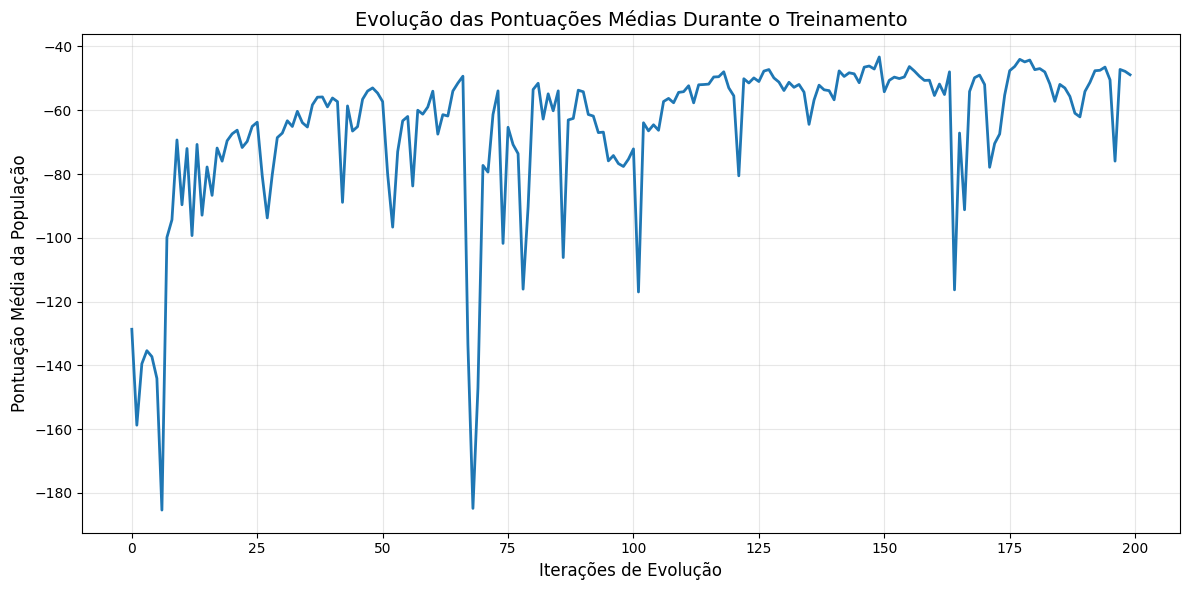

🚀 Training Progress │ 100% │ ████████████████████ │ 2000000/2000000 steps │ ⏱️ 4:14:50 │ ⏳ 00:00 │ 130.80step/s


In [2]:
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("===== AgileRL Online Multi-Agent Demo =====")

    # Define the network configuration
    NET_CONFIG = {
        "latent_dim": 64,
        "encoder_config": {
            "hidden_size": [64],  # Actor hidden size
        },
        "head_config": {
            "hidden_size": [64],  # Critic hidden size
        },
    }
    

    # Define the initial hyperparameters
    INIT_HP = {
        "POPULATION_SIZE": 4,
        "ALGO": "MATD3",  # Algorithm
        "BATCH_SIZE": 256,  # Batch size
        "O_U_NOISE": True,  # Ornstein Uhlenbeck action noise
        "EXPL_NOISE": 0.05,  # Action noise scale
        "MEAN_NOISE": 0.0,  # Mean action noise
        "THETA": 0.15,  # Rate of mean reversion in OU noise
        "DT": 0.01,  # Timestep for OU noise
        "LR_ACTOR": 0.0005,  # Actor learning rate
        "LR_CRITIC": 0.001,  # Critic learning rate
        "GAMMA": 0.98,  # Discount factor
        "MEMORY_SIZE": 100000,  # Max memory buffer size
        "LEARN_STEP": 50,  # Learning frequency
        "TAU": 0.005,  # For soft update of target parameters
        "POLICY_FREQ": 2,  # Policy frequency
    }

    num_envs = 8

    def make_env():
        return simple_speaker_listener_v4.parallel_env(continuous_actions=True)

    env = make_multi_agent_vect_envs(env=make_env, num_envs=num_envs)

    # Configure the multi-agent algo input arguments
    observation_spaces = [env.single_observation_space(agent) for agent in env.agents]
    action_spaces = [env.single_action_space(agent) for agent in env.agents]

    # Append number of agents and agent IDs to the initial hyperparameter dictionary
    INIT_HP["AGENT_IDS"] = env.agents


    # Mutation config for RL hyperparameters
    hp_config = HyperparameterConfig(
        lr_actor=RLParameter(min=1e-4, max=1e-3),
        lr_critic=RLParameter(min=1e-4, max=5e-3),
        batch_size=RLParameter(min=64, max=256, dtype=int),
        learn_step=RLParameter(
            min=25, max=200, dtype=int, grow_factor=1.5, shrink_factor=0.75
        ),
    )

    # Create a population ready for evolutionary hyper-parameter optimisation
    pop: list[MATD3] = create_population(
    algo=INIT_HP["ALGO"],
    net_config=NET_CONFIG,
    INIT_HP=INIT_HP,
    observation_space=observation_spaces,
    action_space=action_spaces,
    hp_config=hp_config,
    population_size=INIT_HP["POPULATION_SIZE"],
    num_envs=num_envs,
    device=device,
)

    # Configure the multi-agent replay buffer
    field_names = ["obs", "action", "reward", "next_obs", "done"]
    memory = MultiAgentReplayBuffer(
        INIT_HP["MEMORY_SIZE"],
        field_names=field_names,
        agent_ids=INIT_HP["AGENT_IDS"],
        device=device,
    )

    # Instantiate a tournament selection object (used for HPO)
    tournament = TournamentSelection(
        tournament_size=2,  # Tournament selection size
        elitism=True,  # Elitism in tournament selection
        population_size=INIT_HP["POPULATION_SIZE"],  # Population size
        eval_loop=1,  # Evaluate using last N fitness scores
    )

    # Instantiate a mutations object (used for HPO)
    mutations = Mutations(
        no_mutation=0.5,  # Probability of no mutation
        architecture=0.1,  # Probability of architecture mutation
        new_layer_prob=0.05,  # Probability of new layer mutation
        parameters=0.05,  # Probability of parameter mutation
        activation=0,  # Probability of activation function mutation
        rl_hp=0.2,  # Probability of RL hyperparameter mutation
        mutation_sd=0.05,  # Mutation strength
        rand_seed=1,
        device=device,
    )

    # Define training loop parameters
    max_steps = 2_000_000  # Max steps (default: 2000000)
    learning_delay = 0  # Steps before starting learning
    evo_steps = 10_000  # Evolution frequency
    eval_steps = None  # Evaluation steps per episode - go until done
    eval_loop = 1  # Number of evaluation episodes
    elite = pop[0]  # Assign a placeholder "elite" agent
    total_steps = 0
    
    # Lista para armazenar pontuações médias para plotagem
    training_scores_history = []

    # TRAINING LOOP
    print("Training...")
    pbar = default_progress_bar(max_steps)
    while np.less([agent.steps[-1] for agent in pop], max_steps).all():
        pop_episode_scores = []
        for agent in pop:  # Loop through population
            agent.set_training_mode(True)
            obs, info = env.reset()  # Reset environment at start of episode
            scores = np.zeros(num_envs)
            completed_episode_scores = []
            steps = 0
            for idx_step in range(evo_steps // num_envs):
                action, raw_action = agent.get_action(
                    obs=obs, infos=info
                )  # Predict action
                next_obs, reward, termination, truncation, info = env.step(
                    action
                )  # Act in environment

                scores += np.sum(np.array(list(reward.values())).transpose(), axis=-1)
                total_steps += num_envs
                steps += num_envs

                # Save experiences to replay buffer
                memory.save_to_memory(
                    obs,
                    raw_action,
                    reward,
                    next_obs,
                    termination,
                    is_vectorised=True,
                )

                # Learn according to learning frequency
                # Handle learn steps > num_envs
                if agent.learn_step > num_envs:
                    learn_step = agent.learn_step // num_envs
                    if (
                        idx_step % learn_step == 0
                        and len(memory) >= agent.batch_size
                        and memory.counter > learning_delay
                    ):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                # Handle num_envs > learn step; learn multiple times per step in env
                elif (
                    len(memory) >= agent.batch_size and memory.counter > learning_delay
                ):
                    for _ in range(num_envs // agent.learn_step):
                        experiences = memory.sample(
                            agent.batch_size
                        )  # Sample replay buffer
                        agent.learn(
                            experiences
                        )  # Learn according to agent's RL algorithm

                obs = next_obs

                # Calculate scores and reset noise for finished episodes
                reset_noise_indices = []
                term_array = np.array(list(termination.values())).transpose()
                trunc_array = np.array(list(truncation.values())).transpose()
                for idx, (d, t) in enumerate(zip(term_array, trunc_array)):
                    if np.any(d) or np.any(t):
                        completed_episode_scores.append(scores[idx])
                        agent.scores.append(scores[idx])
                        scores[idx] = 0
                        reset_noise_indices.append(idx)

                agent.reset_action_noise(reset_noise_indices)

            pbar.update(evo_steps // len(pop))

            agent.steps[-1] += steps
            pop_episode_scores.append(completed_episode_scores)

        # Evaluate population
        fitnesses = [
            agent.test(
                env,
                max_steps=eval_steps,
                loop=eval_loop,
            )
            for agent in pop
        ]
        mean_scores = [
            (
                np.mean(episode_scores)
                if len(episode_scores) > 0
                else 0
            )
            for episode_scores in pop_episode_scores
        ]
        
        # Salvar pontuação média da população para plotagem
        population_mean_score = np.mean([score for score in mean_scores if isinstance(score, (int, float))])
        training_scores_history.append(population_mean_score)

        mean_scores_display = [
            (
                score if isinstance(score, (int, float))
                else "0 completed episodes"
            )
            for score in mean_scores
        ]

        pbar.write(
            f"--- Global steps {total_steps} ---\n"
            f"Steps {[agent.steps[-1] for agent in pop]}\n"
            f"Scores: {mean_scores_display}\n"
            f"Fitnesses: {['%.2f' % fitness for fitness in fitnesses]}\n"
            f"5 fitness avgs: {['%.2f' % np.mean(agent.fitness[-5:]) for agent in pop]}\n"
            f"Mutations: {[agent.mut for agent in pop]}"
        )

        # Tournament selection and population mutation
        elite, pop = tournament.select(pop)
        pop = mutations.mutation(pop)

        # Update step counter
        for agent in pop:
            agent.steps.append(agent.steps[-1])

    # Save the trained algorithm
    path = "./models/MATD3"
    filename = "MATD3_trained_agent.pt"
    os.makedirs(path, exist_ok=True)
    save_path = os.path.join(path, filename)
    elite.save_checkpoint(save_path)
    
    # Plotar e salvar a evolução das pontuações
    plt.figure(figsize=(12, 6))
    plt.plot(training_scores_history, linewidth=2)
    plt.title('Evolução das Pontuações Médias Durante o Treinamento', fontsize=14)
    plt.xlabel('Iterações de Evolução', fontsize=12)
    plt.ylabel('Pontuação Média da População', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Salvar o gráfico
    plot_path = os.path.join(path, "training_scores_evolution.png")
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Gráfico de evolução das pontuações salvo em: {plot_path}")
    
    # Salvar dados das pontuações em arquivo numpy
    scores_data_path = os.path.join(path, "training_scores_history.npy")
    np.save(scores_data_path, np.array(training_scores_history))
    print(f"Dados das pontuações salvos em: {scores_data_path}")
    
    plt.show()

    pbar.close()
    env.close()
